# Olympic Summer & Winter Games, 1896-2022

[Dataset en Kaggle](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018/).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
olympic_athletes = pd.read_csv("olympic_athletes.csv")
olympic_hosts = pd.read_csv("olympic_hosts.csv")
olympic_medals = pd.read_csv("olympic_medals.csv")
olympic_results = pd.read_csv("olympic_results.csv")

## Olympic athletes

### Preprocesamento dos datos

In [3]:
# Unha ollada aos datos
olympic_athletes.head()

athlete_url       athlete_full_name  \
0  https://olympics.com/en/athletes/cooper-woods-...  Cooper WOODS-TOPALOVIC   
1          https://olympics.com/en/athletes/elofsson          Felix ELOFSSON   
2     https://olympics.com/en/athletes/dylan-walczyk           Dylan WALCZYK   
3     https://olympics.com/en/athletes/olli-penttala           Olli PENTTALA   
4          https://olympics.com/en/athletes/reikherd        Dmitriy REIKHERD   

   games_participations        first_game  athlete_year_birth athlete_medals  \
0                     1      Beijing 2022              2000.0            NaN   
1                     2  PyeongChang 2018              1995.0            NaN   
2                     1      Beijing 2022              1993.0            NaN   
3                     1      Beijing 2022              1995.0            NaN   
4                     1      Beijing 2022              1989.0            NaN   

   bio  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [4]:
# Tamaño do dataset? Filas? Atributos?
olympic_athletes.shape

(75904, 7)

In [5]:
# Listar todas as columnas
columns = list(olympic_athletes.columns)
columns

['athlete_url',
 'athlete_full_name',
 'games_participations',
 'first_game',
 'athlete_year_birth',
 'athlete_medals',
 'bio']

Os campos son:
* athlete_url: url do atleta na web [olympics.com](https://olympics.com/); este atributo serve para enlazar con `olympic_medals.csv` e `olympic_results.csv`
* athlete_full_name: o nome completo do atleta
* games_participations: a cantidade de veces que participou o atleta en xogos olímpicos
* first_game: o xogo olímpico primeiro (ou único) no que participou o atleta
* athlete_year_birth: o ano de nacemento do atleta
* athlete_medals: as cantidades de medallas de ouro, prata a bronce que ganou o atleta
* bio: pequena biografía do atleta

In [6]:
# Consultar os tipos de datos e cantos valores hai de cada
olympic_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


Todos os tipos de datos son `object` agás `games_participations` (ten que ser enteiro porque ninguén pode participar nunha "fracción" de xogo olímpico) e `athlete_year_birth` (tamén ten que ser enteiro porque os anos son números enteiros). Este segundo tipo de dato está mal (é `float64`). Isto farémolo despois do tratamento de nulos da columna.

In [7]:
# Creamos dúas listas diferentes:
# - nomes das columnas categóricas
# - nomes das columnas numéricas 
# Isto facilitará o tratamento das diferentes variables por separado

cats = list(olympic_athletes.select_dtypes(include=['object']).columns)
nums = list(olympic_athletes.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['athlete_url', 'athlete_full_name', 'first_game', 'athlete_medals', 'bio']
Variables numéricas: ['games_participations', 'athlete_year_birth']


In [8]:
# Consultamos o número de valores diferentes en cada columna
olympic_athletes.nunique(axis=0)

athlete_url             75900
athlete_full_name       75480
games_participations       11
first_game                 53
athlete_year_birth        165
athlete_medals            170
bio                     22530
dtype: int64

#### TRATAMENTO DE MISSING VALUES

In [9]:
# búsqueda de nans
olympic_athletes.isna().sum()

athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth       2456
athlete_medals          60552
bio                     53062
dtype: int64

In [10]:
# mostrar as liñas que teñen nan
olympic_athletes[olympic_athletes.isnull().any(axis=1)]

athlete_url  \
0      https://olympics.com/en/athletes/cooper-woods-...   
1              https://olympics.com/en/athletes/elofsson   
2         https://olympics.com/en/athletes/dylan-walczyk   
3         https://olympics.com/en/athletes/olli-penttala   
4              https://olympics.com/en/athletes/reikherd   
...                                                  ...   
75899    https://olympics.com/en/athletes/douglas-weigle   
75900  https://olympics.com/en/athletes/stefania-bertele   
75901    https://olympics.com/en/athletes/walter-cecconi   
75902      https://olympics.com/en/athletes/susan-kelley   
75903  https://olympics.com/en/athletes/andrew-stroukoff   

            athlete_full_name  games_participations        first_game  \
0      Cooper WOODS-TOPALOVIC                     1      Beijing 2022   
1              Felix ELOFSSON                     2  PyeongChang 2018   
2               Dylan WALCZYK                     1      Beijing 2022   
3               Olli PENTTALA                     1      Beijing 2022   
4            Dmitriy REIKHERD                     1      Beijing 2022   
...                       ...                   ...               ...   
75899          Douglas WEIGLE                     1    Innsbruck 1976   
75900        Stefania BERTELE                     1    Innsbruck 1976   
75901          Walter CECCONI                     1    Innsbruck 1976   
75902            Susan KELLEY                     1    Innsbruck 1976   
75903        Andrew STROUKOFF                     1    Innsbruck 1976   

       athlete_year_birth athlete_medals  \
0                  2000.0            NaN   
1                  1995.0            NaN   
2                  1993.0            NaN   
3                  1995.0            NaN   
4                  1989.0            NaN   
...                   ...            ...   
75899              1955.0            NaN   
75900              1957.0            NaN   
75901              1957.0            NaN   
75902              1954.0            NaN   
75903              1960.0            NaN   

                                                     bio  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
75899  \n\n\nKent Weigle competed in ice dancing with...  
75900  \n\n\nStefania Bertele had the following place...  
75901  \n\n\nWalter Cecconi had the following placeme...  
75902  \n\n\nSusie Kelley competed in ice dancing wit...  
75903  \n\n\nAndrew Stroukoff competed in ice dancing...  

[68062 rows x 7 columns]

In [11]:
# proporción de nans
len(olympic_athletes[olympic_athletes.isnull().any(axis=1)]) / len(olympic_athletes)

0.8966852866779089

In [12]:
# Como a porcentaxe non é baixa (un 89,7 %), logo non podemos machacar esas liñas

In [13]:
# Proporción de nans segundo columna:
print(len(olympic_athletes[olympic_athletes.first_game.isnull()]) / len(olympic_athletes))
print(len(olympic_athletes[olympic_athletes.athlete_year_birth.isnull()]) / len(olympic_athletes))
print(len(olympic_athletes[olympic_athletes.athlete_medals.isnull()]) / len(olympic_athletes))
print(len(olympic_athletes[olympic_athletes.bio.isnull()]) / len(olympic_athletes))

0.0002898397976391231
0.0323566610455312
0.7977445193929174
0.6990672428330523


In [14]:
# A porcentaxe é baixa en dúas columnas: first_games (0,03 %) e athlete_year_birth (3,2 %), logo podemos machacar esas filas.
# A porcentaxe é baixa (un 1,5%), logo podemos machacar esas liñas
olympic_athletes = olympic_athletes[olympic_athletes.first_game.notna()]
olympic_athletes = olympic_athletes[olympic_athletes.athlete_year_birth.notna()]

In [15]:
olympic_athletes.shape

(73429, 7)

In [16]:
# Conversión a tipo enteiro dos valores de anos de nacemento tipo 'float'
olympic_athletes.athlete_year_birth = olympic_athletes.athlete_year_birth.apply(lambda x: int(x))

In [17]:
# búsqueda de nans
olympic_athletes.isna().sum()

athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                  0
athlete_year_birth          0
athlete_medals          58342
bio                     51481
dtype: int64

In [18]:
# Substitución de valores que faltan con unha cadea de caracteres fixa (salto de liña)
# Replacement of missing values with a fixed string (line break)
olympic_athletes = olympic_athletes.fillna("\n")

#### TRATAMENTO DE DUPLICADOS

In [19]:
olympic_athletes.columns

Index(['athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio'],
      dtype='object')

In [20]:
# Buscar filas duplicadas
print(f'Total de filas duplicadas: {olympic_athletes.duplicated().sum()}')

Total de filas duplicadas: 0


In [21]:
# Probamos a buscar duplicación na columna de URL:
urls = list(olympic_athletes[olympic_athletes.athlete_url.duplicated()].athlete_url)
for url in urls:
    print(olympic_athletes[olympic_athletes.athlete_url == url])

                                    athlete_url athlete_full_name  \
1843  https://olympics.com/en/athletes/geiger-1    Vinzenz GEIGER   
7662  https://olympics.com/en/athletes/geiger-1    Vinzenz Geiger   

      games_participations        first_game  athlete_year_birth  \
1843                     2  PyeongChang 2018                1997   
7662                     2  PyeongChang 2018                1997   

                      athlete_medals bio  
1843  \n\n\n2\n\nG\n\n\n\n1\n\nS\n\n  \n  
7662  \n\n\n2\n\nG\n\n\n\n1\n\nS\n\n  \n  
                                      athlete_url athlete_full_name  \
1381  https://olympics.com/en/athletes/belorukova      Yulia STUPAK   
8175  https://olympics.com/en/athletes/belorukova  Yulia BELORUKOVA   

      games_participations        first_game  athlete_year_birth  \
1381                     2  PyeongChang 2018                1995   
8175                     2  PyeongChang 2018                1995   

                      athlete_medals bi

In [22]:
# Son valores duplicados, ben porque escribiron mal o nome nunha das veces, ben polo cambio de apelido do atleta.
# Procédese a eliminar estes duplicados:
olympic_athletes.drop([*list(olympic_athletes[olympic_athletes.athlete_url.duplicated()].index)], inplace=True)

In [23]:
# Probamos a buscar duplicación na combinación das columnas athlete_full_name, first_game e athlete_year_birth:
olympic_athletes[olympic_athletes[["athlete_full_name","first_game","athlete_year_birth"]].duplicated(keep=False)].sort_values("athlete_full_name").head()

athlete_url  \
7225  https://olympics.com/en/athletes/angelina-goli...   
1706  https://olympics.com/en/athletes/angelina-goli...   
7176  https://olympics.com/en/athletes/bart-swings-x...   
1667       https://olympics.com/en/athletes/bart-swings   
7563   https://olympics.com/en/athletes/dufour-lapointe   

          athlete_full_name  games_participations      first_game  \
7225      Angelina GOLIKOVA                     2      Sochi 2014   
1706      Angelina GOLIKOVA                     3      Sochi 2014   
7176            Bart SWINGS                     2      Sochi 2014   
1667            Bart SWINGS                     3      Sochi 2014   
7563  Chloe DUFOUR-LAPOINTE                     3  Vancouver 2010   

      athlete_year_birth                  athlete_medals bio  
7225                1991                              \n  \n  
1706                1991                \n\n\n1\n\nB\n\n  \n  
7176                1991                \n\n\n1\n\nS\n\n  \n  
1667                1991  \n\n\n1\n\nG\n\n\n\n1\n\nS\n\n  \n  
7563                1991                \n\n\n1\n\nS\n\n  \n

In [24]:
# Aínda que non son duplicacións, refírense á mesma persoa; son datos desactualizados.
olympic_athletes[olympic_athletes[["athlete_full_name","first_game","athlete_year_birth"]].duplicated()].sort_values("athlete_full_name").head()

athlete_url  \
7225   https://olympics.com/en/athletes/angelina-goli...   
7176   https://olympics.com/en/athletes/bart-swings-x...   
7563    https://olympics.com/en/athletes/dufour-lapointe   
69120  https://olympics.com/en/athletes/christopher-s...   
10320        https://olympics.com/en/athletes/david-graf   

           athlete_full_name  games_participations      first_game  \
7225       Angelina GOLIKOVA                     2      Sochi 2014   
7176             Bart SWINGS                     2      Sochi 2014   
7563   Chloe DUFOUR-LAPOINTE                     3  Vancouver 2010   
69120     Christopher SPRING                     3  Vancouver 2010   
10320             David GRAF                     1        Rio 2016   

       athlete_year_birth    athlete_medals bio  
7225                 1991                \n  \n  
7176                 1991  \n\n\n1\n\nS\n\n  \n  
7563                 1991  \n\n\n1\n\nS\n\n  \n  
69120                1984                \n  \n  
10320                1989                \n  \n

In [25]:
# Procédese a eliminar estes duplicados:
olympic_athletes.drop([*list(olympic_athletes[olympic_athletes[["athlete_full_name","first_game","athlete_year_birth"]].duplicated()].index)], inplace=True)

In [26]:
# Podemos agrupar as variables por tipo por comodidade (recolocar as columnas)
# bloque categóticas vs bloque numéricas
df = pd.concat((olympic_athletes[cats], olympic_athletes[nums]), axis=1)
df

athlete_url  \
0      https://olympics.com/en/athletes/cooper-woods-...   
1              https://olympics.com/en/athletes/elofsson   
2         https://olympics.com/en/athletes/dylan-walczyk   
3         https://olympics.com/en/athletes/olli-penttala   
4              https://olympics.com/en/athletes/reikherd   
...                                                  ...   
75899    https://olympics.com/en/athletes/douglas-weigle   
75900  https://olympics.com/en/athletes/stefania-bertele   
75901    https://olympics.com/en/athletes/walter-cecconi   
75902      https://olympics.com/en/athletes/susan-kelley   
75903  https://olympics.com/en/athletes/andrew-stroukoff   

            athlete_full_name        first_game athlete_medals  \
0      Cooper WOODS-TOPALOVIC      Beijing 2022             \n   
1              Felix ELOFSSON  PyeongChang 2018             \n   
2               Dylan WALCZYK      Beijing 2022             \n   
3               Olli PENTTALA      Beijing 2022             \n   
4            Dmitriy REIKHERD      Beijing 2022             \n   
...                       ...               ...            ...   
75899          Douglas WEIGLE    Innsbruck 1976             \n   
75900        Stefania BERTELE    Innsbruck 1976             \n   
75901          Walter CECCONI    Innsbruck 1976             \n   
75902            Susan KELLEY    Innsbruck 1976             \n   
75903        Andrew STROUKOFF    Innsbruck 1976             \n   

                                                     bio  \
0                                                     \n   
1                                                     \n   
2                                                     \n   
3                                                     \n   
4                                                     \n   
...                                                  ...   
75899  \n\n\nKent Weigle competed in ice dancing with...   
75900  \n\n\nStefania Bertele had the following place...   
75901  \n\n\nWalter Cecconi had the following placeme...   
75902  \n\n\nSusie Kelley competed in ice dancing wit...   
75903  \n\n\nAndrew Stroukoff competed in ice dancing...   

       games_participations  athlete_year_birth  
0                         1                2000  
1                         2                1995  
2                         1                1993  
3                         1                1995  
4                         1                1989  
...                     ...                 ...  
75899                     1                1955  
75900                     1                1957  
75901                     1                1957  
75902                     1                1954  
75903                     1                1960  

[73400 rows x 7 columns]

In [27]:
# Pode ser unha boa idea gardar os datos unha vez limpos e preprocesados
df.to_csv('olympic_athletes_cleaned.csv',index=False)

### ANÁLISE DOS VALORES CATEGÓRICOS

In [28]:
df = pd.read_csv('olympic_athletes_cleaned.csv')

In [29]:
print(f'variables categóricas: {cats}')

variables categóricas: ['athlete_url', 'athlete_full_name', 'first_game', 'athlete_medals', 'bio']


In [30]:
# Creamos un novo dataframe só coas variables categóricas

df_cat= df[cats]
df_cat.head()

athlete_url       athlete_full_name  \
0  https://olympics.com/en/athletes/cooper-woods-...  Cooper WOODS-TOPALOVIC   
1          https://olympics.com/en/athletes/elofsson          Felix ELOFSSON   
2     https://olympics.com/en/athletes/dylan-walczyk           Dylan WALCZYK   
3     https://olympics.com/en/athletes/olli-penttala           Olli PENTTALA   
4          https://olympics.com/en/athletes/reikherd        Dmitriy REIKHERD   

         first_game athlete_medals bio  
0      Beijing 2022             \n  \n  
1  PyeongChang 2018             \n  \n  
2      Beijing 2022             \n  \n  
3      Beijing 2022             \n  \n  
4      Beijing 2022             \n  \n

In [31]:
# limpeza de columnas tipo string, eliminando espazos extra (por precaución) e saltos de liña
for col in cats:
    df_cat.loc[:, col] = df_cat[col].apply(lambda x: ' '.join(x.split()))
    df_cat.loc[:, col] = df_cat[col].apply(lambda x: '\n'.join(x.split("\n")))

In [32]:
# Botar unha ollada aos valores das categorías
for col in cats:
    print(f"Categorías en {col}: {pd.unique(df_cat[col])[:5]}")

Categorías en athlete_url: ['https://olympics.com/en/athletes/cooper-woods-topalovic'
 'https://olympics.com/en/athletes/elofsson'
 'https://olympics.com/en/athletes/dylan-walczyk'
 'https://olympics.com/en/athletes/olli-penttala'
 'https://olympics.com/en/athletes/reikherd']
Categorías en athlete_full_name: ['Cooper WOODS-TOPALOVIC' 'Felix ELOFSSON' 'Dylan WALCZYK' 'Olli PENTTALA'
 'Dmitriy REIKHERD']
Categorías en first_game: ['Beijing 2022' 'PyeongChang 2018' 'Sochi 2014' 'Vancouver 2010'
 'Atlanta 1996']
Categorías en athlete_medals: ['' '1 S' '1 B' '1 G 2 S' '1 G']
Categorías en bio: [''
 'In the period between his elite debut in 2010 and 2018, Canadian moguls specialist Mikael Kingsbury set a host of records in the World Cup, winning the overall title seven times in a row and scoring 49 wins and 73 podium finishes in 90 starts. He then capped it all by fulfilling his dream of winning Olympic gold at PyeongChang 2018 A LOCAL SPECIALITYLearning to ski on the slopes of Quebec’s Laur

In [33]:
for col in cats:
    print(f"Categorías repetidas en {col}:")
    print(df_cat[(df_cat[col].duplicated()) & (df_cat[col] != "") & (df_cat[col].notna())][col])

Categorías repetidas en athlete_url:
Series([], Name: athlete_url, dtype: object)
Categorías repetidas en athlete_full_name:
2386       Teresa PORTELA
3250              Qian LI
3332           Ayano SATO
4377           Qiang WANG
4423           James HALL
               ...       
73051    Gunnar JOHANSSON
73078          Jiri PECKA
73132       Miklos NEMETH
73293         Karl KÖTHER
73385        David PORTER
Name: athlete_full_name, Length: 387, dtype: object
Categorías repetidas en first_game:
2            Beijing 2022
3            Beijing 2022
4            Beijing 2022
6        PyeongChang 2018
7        PyeongChang 2018
               ...       
73395      Innsbruck 1976
73396      Innsbruck 1976
73397      Innsbruck 1976
73398      Innsbruck 1976
73399      Innsbruck 1976
Name: first_game, Length: 73347, dtype: object
Categorías repetidas en athlete_medals:
7        1 B
31       1 B
44       1 S
59       1 G
70       1 B
        ... 
73362    1 B
73363    1 B
73364    1 B
73374    1 

In [34]:
df_cat.describe()

athlete_url athlete_full_name  \
count                                               73400             73400   
unique                                              73400             73013   
top     https://olympics.com/en/athletes/cooper-woods-...       Ivan IVANOV   
freq                                                    1                 4   

       first_game athlete_medals    bio  
count       73400          73400  73400  
unique         53            171  21693  
top      Rio 2016                        
freq         4110          58319  51454

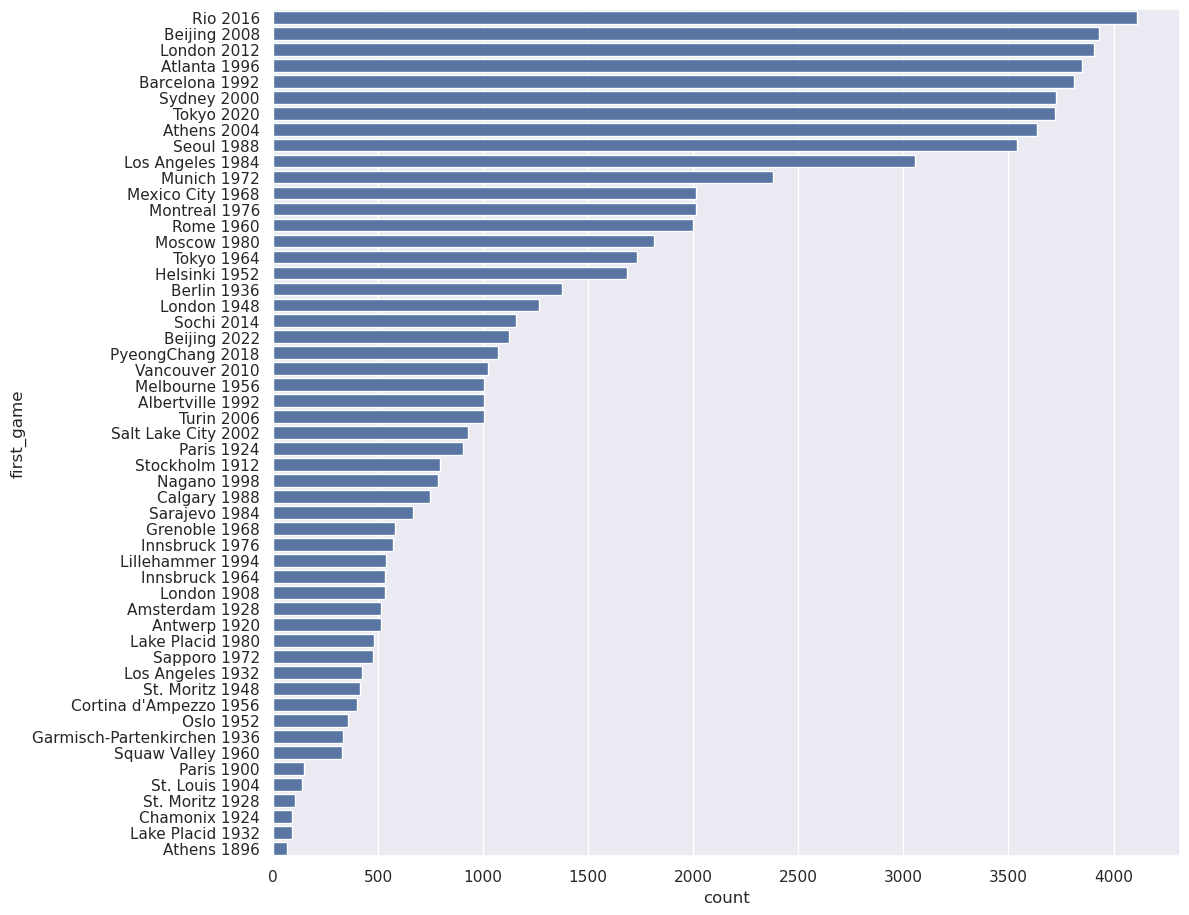

In [35]:
# Countplot pode ser unha boa opción para ver como se distribúen os datos nas variables categóricas
sns.set_theme(style='darkgrid', rc={'figure.figsize':(11.7,11)})

# Distribución de "first_game"
sns.countplot(data=df_cat, y='first_game', order=df_cat['first_game'].value_counts().index)
plt.show()

In [36]:
# first_game inclúen a cidade e o ano

# Podemos extraer a cidade de `first_game`, coa intención de crear unha nova categoría 
df_cat = df_cat.assign(first_city=df_cat['first_game'].apply(lambda x: ' '.join(x.split()[:-1])))

# Eliminamos a cidade e deixamos só o ano, que é numérico, pero isto facémolo despois

cats.extend(['first_city'])

print(f'Variables categóricas:  {cats}')
df_cat.first_city.unique()

Variables categóricas:  ['athlete_url', 'athlete_full_name', 'first_game', 'athlete_medals', 'bio', 'first_city']


array(['Beijing', 'PyeongChang', 'Sochi', 'Vancouver', 'Atlanta', 'Turin',
       'Salt Lake City', 'Nagano', 'Rio', 'Grenoble', 'Berlin', 'Athens',
       'Montreal', 'Los Angeles', 'Albertville', 'Sarajevo', 'Tokyo',
       'London', 'Sydney', 'Seoul', 'Mexico City', 'Barcelona',
       'Helsinki', 'Rome', 'Lillehammer', 'Moscow', 'Munich', 'Calgary',
       'Lake Placid', "Cortina d'Ampezzo", 'Innsbruck', 'Sapporo',
       'Melbourne', 'Squaw Valley', 'St. Moritz', 'Oslo', 'Paris',
       'Garmisch-Partenkirchen', 'Amsterdam', 'Antwerp', 'Chamonix',
       'Stockholm', 'St. Louis'], dtype=object)

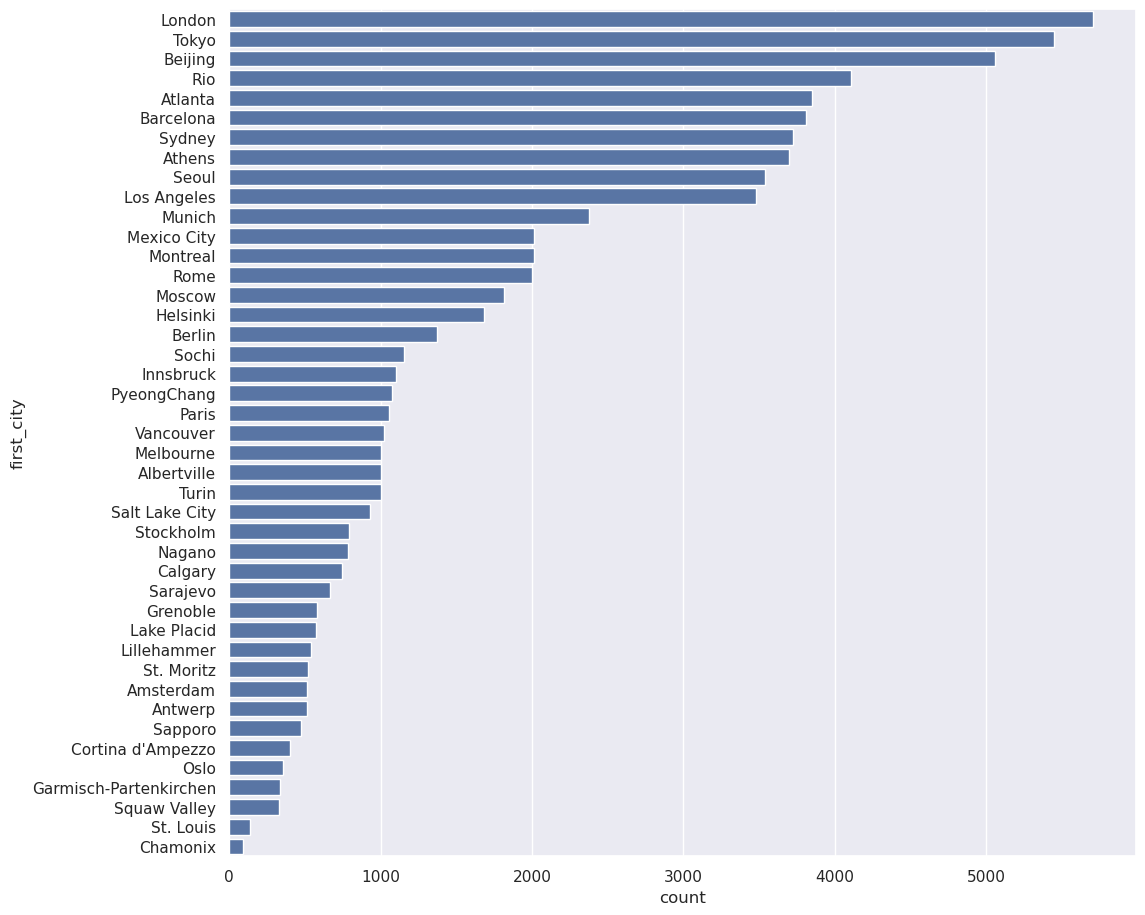

In [37]:
# Countplot pode ser unha boa opción para ver como se distribúen os datos nas variables categóricas
sns.set_theme(style='darkgrid', rc={'figure.figsize':(11.7,11)})

# Distribución de "first_city"
sns.countplot(data=df_cat,y='first_city', order=df_cat['first_city'].value_counts().index)
plt.show()

In [38]:
# o 20 % de cidades de primeiras participacións abarca o 53 % das primeiras participacións: distribución non uniforme
df_cat.first_city.value_counts()[:9].sum() / df_cat.first_city.count(), 9 / len(df_cat.first_city.unique())

(0.530558583106267, 0.20930232558139536)

In [39]:
# Sobre a columna das medallas: poderíase crear tres novas columnas 'B', 'S', e 'G' e enchelas coas cantidades que cada atleta ten de cada tipo de medalla. Serían columnas numéricas e esta columna categórica borrariase.
df_cat.athlete_medals.unique()

array(['', '1 S', '1 B', '1 G 2 S', '1 G', '1 G 1 B', '2 G 1 S',
       '1 S 1 B', '2 S 1 B', '2 B', '1 G 1 S 1 B', '1 G 1 S', '1 S 3 B',
       '2 G 4 S 5 B', '3 G 2 S', '2 G 2 B', '2 G 2 S 1 B', '4 G 1 S 1 B',
       '2 G', '1 S 2 B', '2 G 1 B', '3 B', '2 S', '3 G', '1 G 2 S 1 B',
       '1 G 2 B', '4 G', '3 G 1 B', '6 G 1 B', '3 G 2 S 1 B', '2 G 3 S',
       '5 G 2 S 1 B', '3 G 2 B', '2 G 3 S 3 B', '1 G 2 S 2 B', '1 G 3 B',
       '3 G 1 S 1 B', '5 G 1 S 1 B', '4 B', '1 G 3 S 1 B', '3 S 1 B',
       '2 S 3 B', '3 G 6 S', '2 G 1 S 1 B', '2 G 4 S 1 B', '6 G 5 S 2 B',
       '5 G 2 S 2 B', '4 G 2 S 3 B', '3 G 2 S 2 B', '2 G 3 S 1 B',
       '4 G 2 S', '2 S 2 B', '3 S 2 B', '2 G 2 S', '5 G 1 B',
       '6 G 1 S 1 B', '1 G 1 S 2 B', '5 G', '2 S 4 B', '7 G 2 S',
       '4 G 1 S 2 B', '3 G 3 B', '1 G 4 S 2 B', '3 G 1 S', '7 G 5 S',
       '3 G 1 S 2 B', '1 G 3 S', '1 G 1 S 4 B', '7 G 3 S 1 B', '5 G 1 S',
       '1 G 1 S 3 B', '3 G 4 S 1 B', '7 G 3 S', '4 G 1 S 3 B',
       '5 G 2 S 4 B', '

NOVA INFORMACIÓN EXTRAÍDA DA ANÁLISE -- Insights
- `athlete_url`, `athlete_full_name`, e `bio` teñen demasiadas categorías, practicamente unha por liña, polo que non nos daría ningunha información útil. En `bio` más da metade de atletas non teñen ningunha biografía e falseouse un salto de liña que non dá ningunha información útil.
- creamos unha nova variable `first_city` para as cidades nas que os atletas participaron por primeira vez nun xogo olímpico independentemente do ano.
- máis adiante crearemos novas variables con respecto ós anos nos que os atletas participaron por primeira vez nun xogo olímpico e coas cantidades de medallas obtidas de cada tipo por cada atleta.
- a distribución de `first_city` non é uniforme e poucas cidades (9, é dicir, un 20 %) abarcan a maior parte (53 %) das primeiras participacións en xogos olímpicos dos atletas.

CONCLUSIÓNS
* todos os atributos categóricos ou ben teñen demasiadas categorías ou ben están moi desbalanceados e lonxe da distribución uniforme.

In [40]:
df_cat.describe()

athlete_url athlete_full_name  \
count                                               73400             73400   
unique                                              73400             73013   
top     https://olympics.com/en/athletes/cooper-woods-...       Ivan IVANOV   
freq                                                    1                 4   

       first_game athlete_medals    bio first_city  
count       73400          73400  73400      73400  
unique         53            171  21693         43  
top      Rio 2016                           London  
freq         4110          58319  51454       5704

In [41]:
# como só hai un atributo categórico sen demasiadas categorías, non se pode facer ningunha procura de relacións entre variables categóricas

In [42]:
# Ate este punto chega a análise das variables categórigas. Só o atributo de 'first_game' é de interese.
# Pódese eliminar do dataset os atributos 'athlete_url', 'athlete_full_name' e 'bio', pero o primeiro serve como identificador do atleta para a fusión con outro arquivo .csv.
# Procédese a eliminar do dataset os atributos 'athlete_full_name' e 'bio'.
# A reducción de características é unha parte do proceso, eliminar os datos que non nos aportan información.
df_cat.drop(columns=['athlete_full_name', 'bio'], inplace=True)

In [43]:
# Preparamos o dataframe para almacenalo antes de pasar ao seguinte punto da análise
df = pd.concat((df_cat, df.loc[:, 'games_participations':'athlete_year_birth']), axis=1)
df

athlete_url        first_game  \
0      https://olympics.com/en/athletes/cooper-woods-...      Beijing 2022   
1              https://olympics.com/en/athletes/elofsson  PyeongChang 2018   
2         https://olympics.com/en/athletes/dylan-walczyk      Beijing 2022   
3         https://olympics.com/en/athletes/olli-penttala      Beijing 2022   
4              https://olympics.com/en/athletes/reikherd      Beijing 2022   
...                                                  ...               ...   
73395    https://olympics.com/en/athletes/douglas-weigle    Innsbruck 1976   
73396  https://olympics.com/en/athletes/stefania-bertele    Innsbruck 1976   
73397    https://olympics.com/en/athletes/walter-cecconi    Innsbruck 1976   
73398      https://olympics.com/en/athletes/susan-kelley    Innsbruck 1976   
73399  https://olympics.com/en/athletes/andrew-stroukoff    Innsbruck 1976   

      athlete_medals   first_city  games_participations  athlete_year_birth  
0                         Beijing                     1                2000  
1                     PyeongChang                     2                1995  
2                         Beijing                     1                1993  
3                         Beijing                     1                1995  
4                         Beijing                     1                1989  
...              ...          ...                   ...                 ...  
73395                   Innsbruck                     1                1955  
73396                   Innsbruck                     1                1957  
73397                   Innsbruck                     1                1957  
73398                   Innsbruck                     1                1954  
73399                   Innsbruck                     1                1960  

[73400 rows x 6 columns]

In [44]:
# Gardamos os cambios a un novo ficheiro
df.to_csv('olympic_athletes_cated.csv', index=False)

### ANÁLISE DOS VALORES NUMÉRICOS

In [45]:
# Cargamos o dataset gardado despois da parte do EDA de variables categóricas
df = pd.read_csv("olympic_athletes_cated.csv")
df.head()

athlete_url        first_game  \
0  https://olympics.com/en/athletes/cooper-woods-...      Beijing 2022   
1          https://olympics.com/en/athletes/elofsson  PyeongChang 2018   
2     https://olympics.com/en/athletes/dylan-walczyk      Beijing 2022   
3     https://olympics.com/en/athletes/olli-penttala      Beijing 2022   
4          https://olympics.com/en/athletes/reikherd      Beijing 2022   

  athlete_medals   first_city  games_participations  athlete_year_birth  
0            NaN      Beijing                     1                2000  
1            NaN  PyeongChang                     2                1995  
2            NaN      Beijing                     1                1993  
3            NaN      Beijing                     1                1995  
4            NaN      Beijing                     1                1989

In [46]:
# Creamos un novo dataframe unicamente para os datos das variables numéricas
df_num = df.drop(["athlete_url","first_city"], axis=1)
df_num.head()

first_game athlete_medals  games_participations  athlete_year_birth
0      Beijing 2022            NaN                     1                2000
1  PyeongChang 2018            NaN                     2                1995
2      Beijing 2022            NaN                     1                1993
3      Beijing 2022            NaN                     1                1995
4      Beijing 2022            NaN                     1                1989

In [47]:
print(f'numerical variables: {nums}')

numerical variables: ['games_participations', 'athlete_year_birth']


In [48]:
df_num.describe()

games_participations  athlete_year_birth
count          73400.000000        73400.000000
mean               1.551594         1961.601839
std                0.862157           28.128504
min                1.000000         1836.000000
25%                1.000000         1946.000000
50%                1.000000         1968.000000
75%                2.000000         1983.000000
max               10.000000         2009.000000

In [49]:
# Como fora dito, first_game inclúen a cidade e o ano

# A cidade fora extraída de `first_game`, coa intención de crear unha nova categoría 

# Eliminamos a cidade e deixamos só o ano, que é numérico
df_num['first_year'] = df_num['first_game'].apply(lambda x: int(x.split()[-1]))
df_cat.drop('first_game', axis=1, inplace=True)
df_num.drop("first_game", axis=1, inplace=True)
df.drop("first_game", axis=1, inplace=True)

nums.append('first_year')
cats.remove('first_game')

print(f'Variables categóricas:  {nums}')
df_num.first_year.unique()

Variables categóricas:  ['games_participations', 'athlete_year_birth', 'first_year']


array([2022, 2018, 2014, 2010, 1996, 2006, 2002, 1998, 2016, 1968, 1936,
       2004, 1976, 1984, 1992, 2008, 2020, 2012, 2000, 1988, 1952, 1960,
       1994, 1980, 1972, 1964, 1956, 1948, 1924, 1932, 1928, 1920, 1900,
       1908, 1912, 1896, 1904])

In [50]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73400 entries, 0 to 73399
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   athlete_medals        15081 non-null  object
 1   games_participations  73400 non-null  int64 
 2   athlete_year_birth    73400 non-null  int64 
 3   first_year            73400 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ MB


In [51]:
# Como fora dito, athlete_medals inclúe as cantidades de medallas de bronce, prata e ouro para cada atleta. Crearanse as columnas 'B', 'S', e 'G' e eliminarase a columna categórica correspondente.
df_num['B'] = df_num['athlete_medals'].apply(lambda x: int(x[x.index('B') - 2]) if type(x) == str and 'B' in x else 0)
df_num['S'] = df_num['athlete_medals'].apply(lambda x: int(x[x.index('S') - 2]) if type(x) == str and 'S' in x else 0)
df_num['G'] = df_num['athlete_medals'].apply(lambda x: int(x[x.index('G') - 2]) if type(x) == str and 'G' in x else 0)
df_cat.drop('athlete_medals', axis=1, inplace=True)
df_num.drop('athlete_medals', axis=1, inplace=True)
df.drop('athlete_medals', axis=1, inplace=True)

nums.extend(['B','S','G'])
cats.remove('athlete_medals')
print(f'Variables categóricas:  {nums}')

Variables categóricas:  ['games_participations', 'athlete_year_birth', 'first_year', 'B', 'S', 'G']


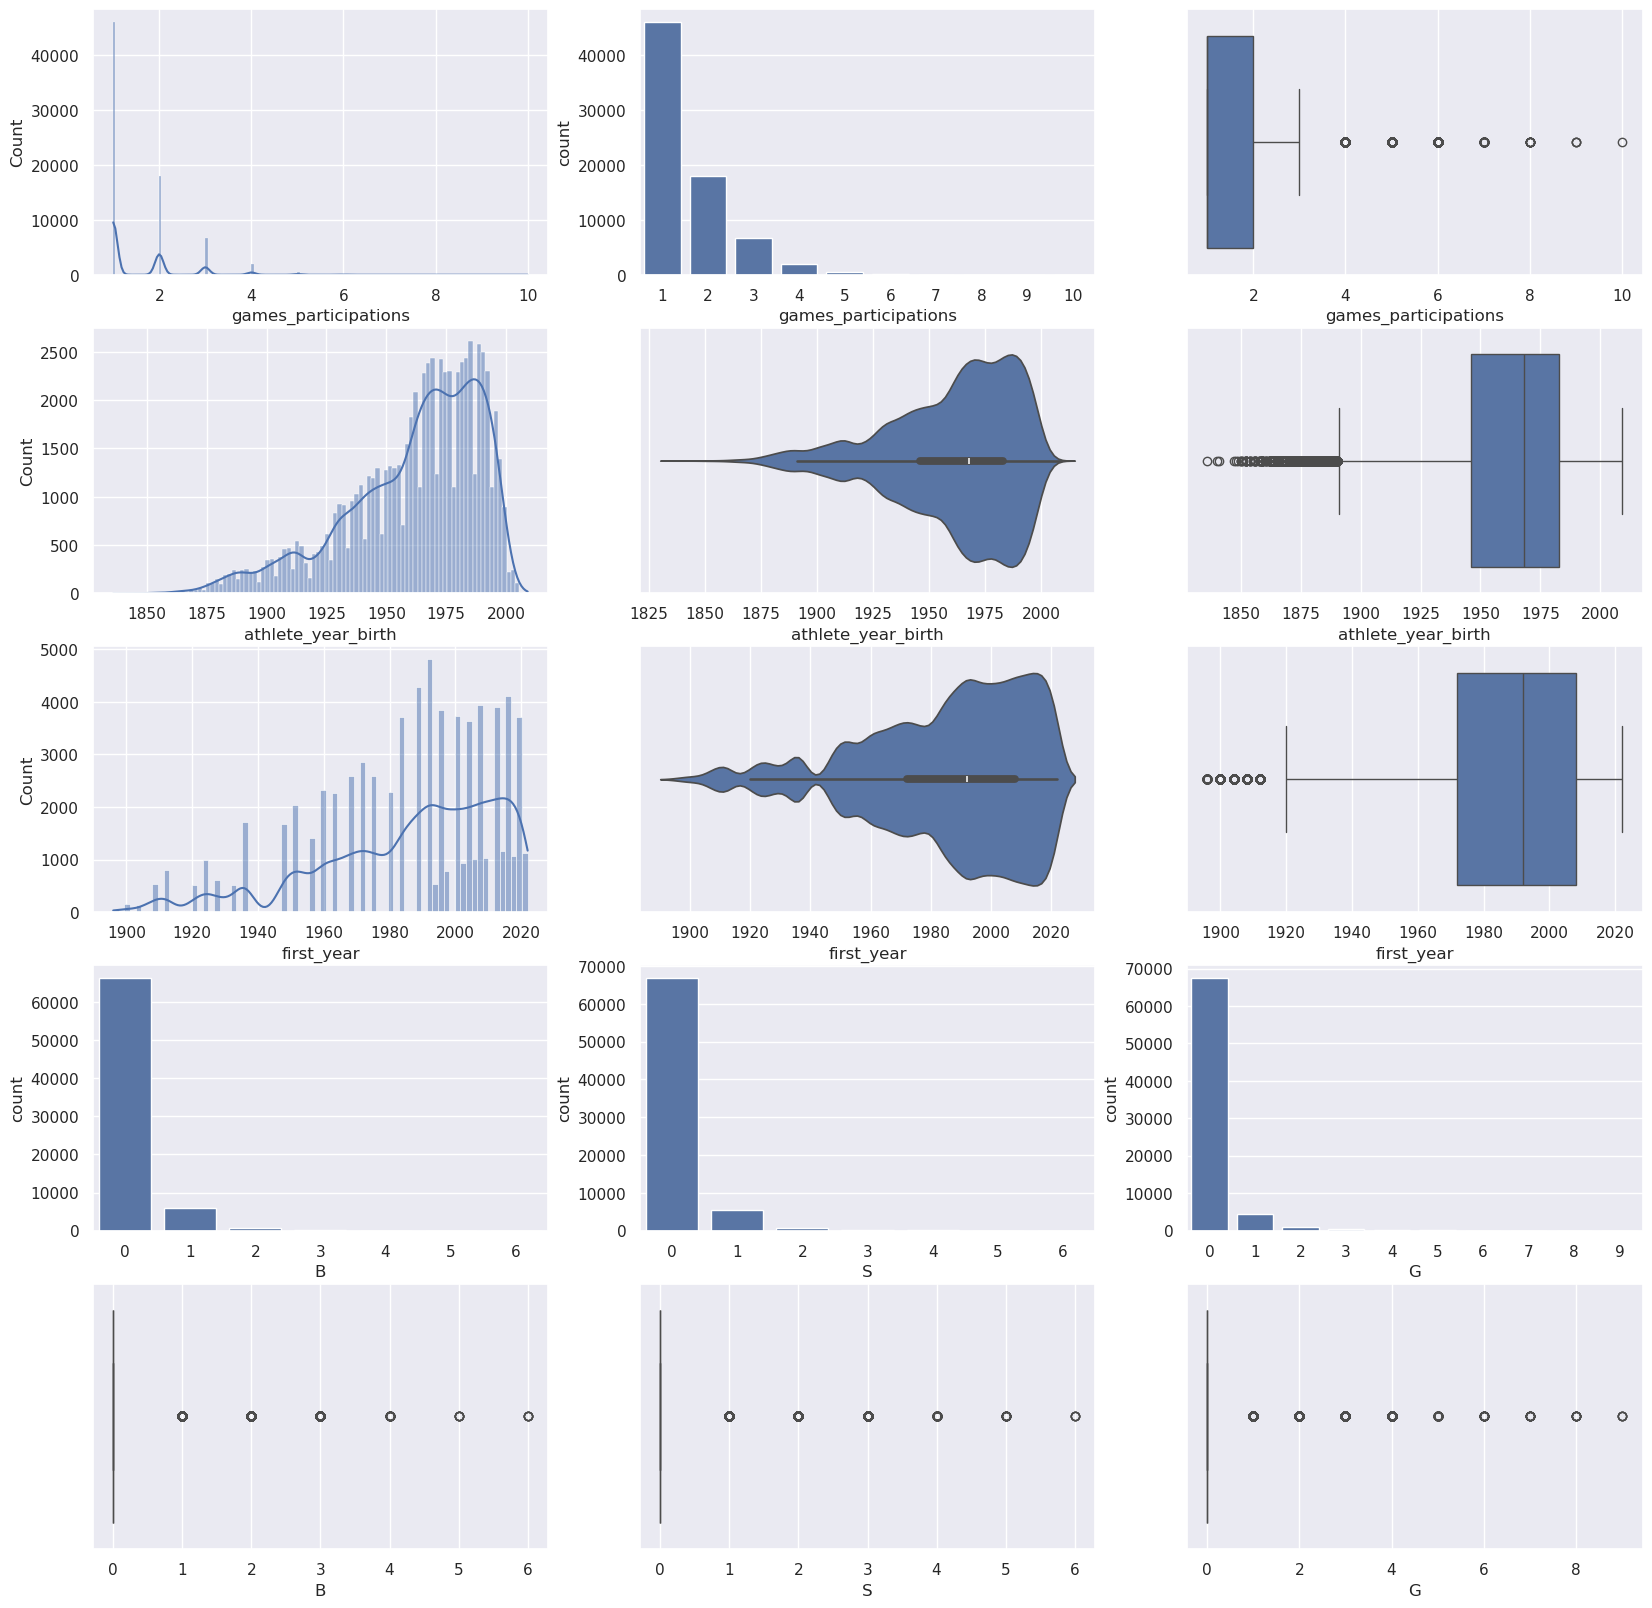

In [52]:
figure, axes = plt.subplots(5,3 ,figsize=(20,20))
sns.histplot(ax=axes[0,0], data=df_num, x="games_participations", kde=True)
sns.countplot(ax=axes[0,1], data=df_num, x="games_participations")
sns.boxplot(ax=axes[0,2], data=df_num, x="games_participations")
sns.histplot(ax=axes[1,0], data=df_num, x="athlete_year_birth", kde=True)
sns.violinplot(ax=axes[1,1], data=df_num, x="athlete_year_birth")
sns.boxplot(ax=axes[1,2], data=df_num, x="athlete_year_birth")
sns.histplot(ax=axes[2,0], data=df_num, x="first_year", kde=True)
sns.violinplot(ax=axes[2,1], data=df_num, x="first_year")
sns.boxplot(ax=axes[2,2], data=df_num, x="first_year")
sns.countplot(ax=axes[3,0], data=df_num, x="B")
sns.countplot(ax=axes[3,1], data=df_num, x="S")
sns.countplot(ax=axes[3,2], data=df_num, x="G")
sns.boxplot(ax=axes[4,0], data=df_num, x="B")
sns.boxplot(ax=axes[4,1], data=df_num, x="S")
sns.boxplot(ax=axes[4,2], data=df_num, x="G")
plt.show()

**Insights**:
- `athlete_year_birth` e `first_year` concentran maior número de ocorrencias cara á dereita, están sesgadas á esquerda. Teñen valores atípicos na esquerda.
- Ter máis de 3 participacións é atípico.
- Ter un número maior de 0 de medallas de calquera tipo é atípico.

In [53]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73400 entries, 0 to 73399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   games_participations  73400 non-null  int64
 1   athlete_year_birth    73400 non-null  int64
 2   first_year            73400 non-null  int64
 3   B                     73400 non-null  int64
 4   S                     73400 non-null  int64
 5   G                     73400 non-null  int64
dtypes: int64(6)
memory usage: 3.4 MB


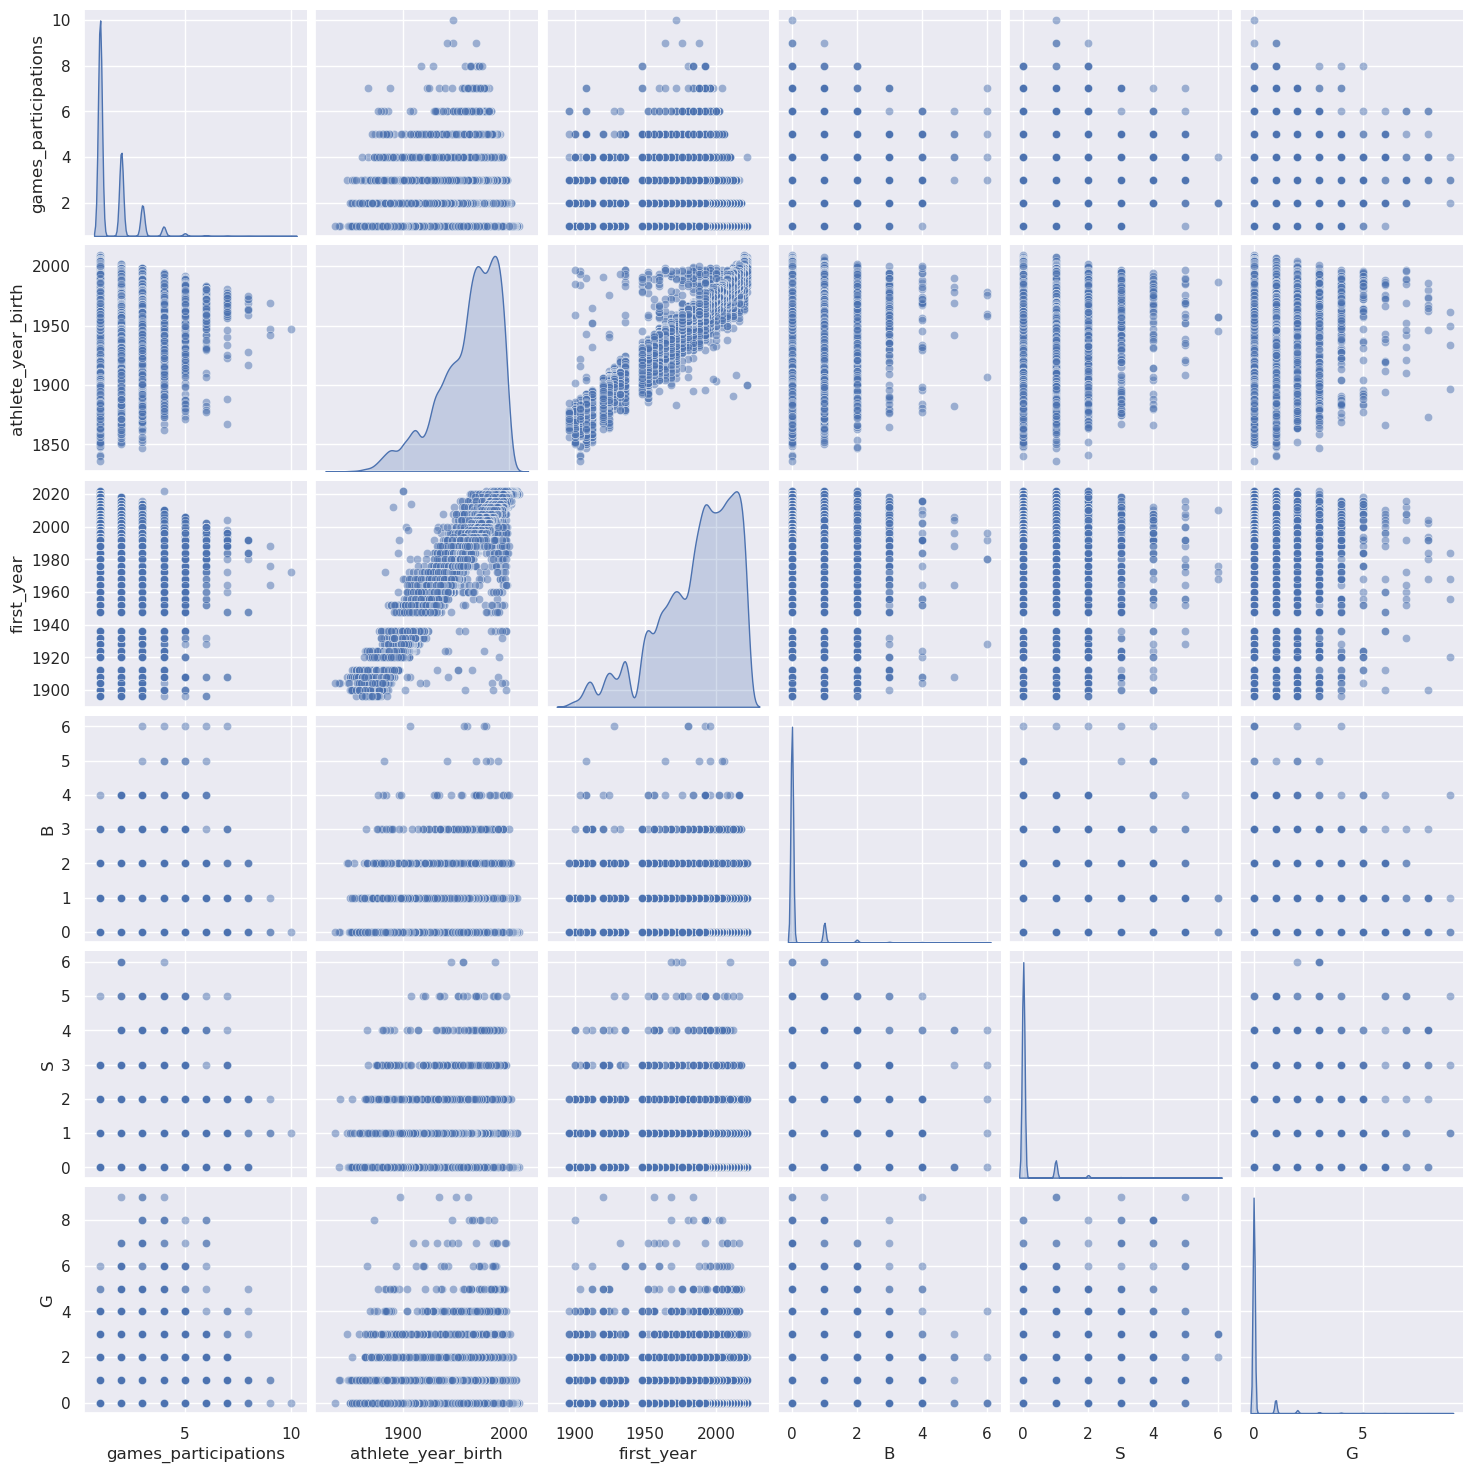

In [54]:
# Relación entre atributos numéricos
sns.pairplot(data=df_num, diag_kind='kde', plot_kws={"alpha": 0.5})
plt.show()

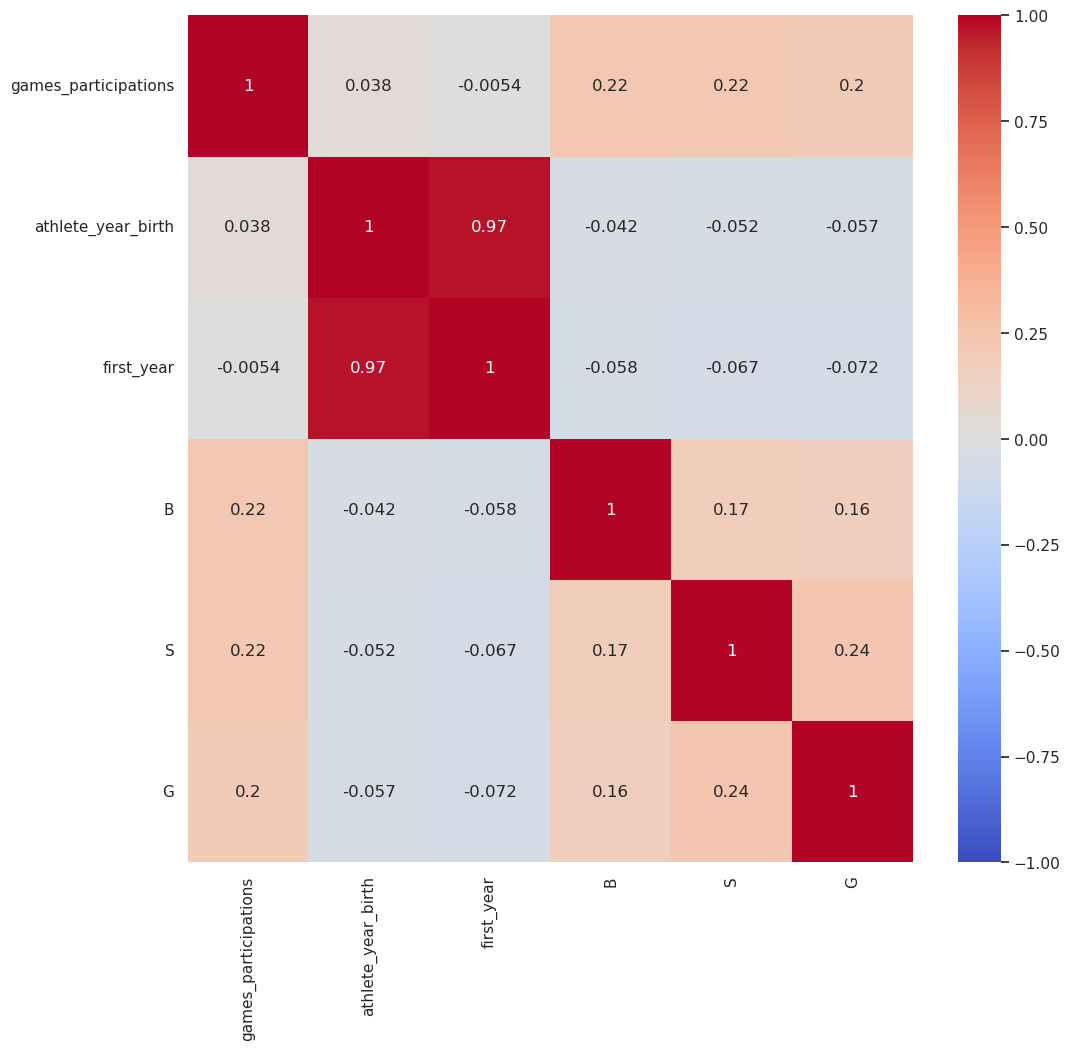

In [55]:
# Matriz de correlación.
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**Insights**
- A medida que aumenta o ano de nacemento, o ano da primeira participación tamén aumenta.
- O incremento no ano da primeira participación aumenta o ano de nacemento.
- A cantidade de medallas aumenta coa cantidade de participacións.
- A cantidade de medallas aumenta coa cantidade das medallas de outros tipos (é dicir, aquel que ten medallas de bronce probablemente tamén terá medallas de prata e ouro).

* `athlete_year_birth` e `first_year` só se correlacionan entre elas; fano positivamente.
* Os demais atributos numéricos correlaciónanse entre eles aínda que en menor medidad que as outras dúas columnas.

In [56]:
df

athlete_url   first_city  \
0      https://olympics.com/en/athletes/cooper-woods-...      Beijing   
1              https://olympics.com/en/athletes/elofsson  PyeongChang   
2         https://olympics.com/en/athletes/dylan-walczyk      Beijing   
3         https://olympics.com/en/athletes/olli-penttala      Beijing   
4              https://olympics.com/en/athletes/reikherd      Beijing   
...                                                  ...          ...   
73395    https://olympics.com/en/athletes/douglas-weigle    Innsbruck   
73396  https://olympics.com/en/athletes/stefania-bertele    Innsbruck   
73397    https://olympics.com/en/athletes/walter-cecconi    Innsbruck   
73398      https://olympics.com/en/athletes/susan-kelley    Innsbruck   
73399  https://olympics.com/en/athletes/andrew-stroukoff    Innsbruck   

       games_participations  athlete_year_birth  
0                         1                2000  
1                         2                1995  
2                         1                1993  
3                         1                1995  
4                         1                1989  
...                     ...                 ...  
73395                     1                1955  
73396                     1                1957  
73397                     1                1957  
73398                     1                1954  
73399                     1                1960  

[73400 rows x 4 columns]

In [57]:
df = pd.concat((df.loc[:, "athlete_url":"first_city"], df_num), axis=1)
df.sample(10)

athlete_url      first_city  \
32122   https://olympics.com/en/athletes/thompson-garcia         Atlanta   
12173  https://olympics.com/en/athletes/christian-zim...             Rio   
6312   https://olympics.com/en/athletes/lamont-marcel...           Tokyo   
11842   https://olympics.com/en/athletes/albert-subirats          Athens   
2882   https://olympics.com/en/athletes/shakhnoza-yun...           Tokyo   
17416    https://olympics.com/en/athletes/madoka-natsumi  Salt Lake City   
72362      https://olympics.com/en/athletes/john-blockey        Grenoble   
35492      https://olympics.com/en/athletes/marcel-blazo       Barcelona   
11182  https://olympics.com/en/athletes/anicka-van-emden             Rio   
35888  https://olympics.com/en/athletes/pablo-guiller...       Barcelona   

       games_participations  athlete_year_birth  first_year  B  S  G  
32122                     1                1970        1996  0  0  0  
12173                     1                1961        2016  0  0  0  
6312                      1                1994        2020  0  0  2  
11842                     4                1986        2004  0  0  0  
2882                      1                1999        2020  0  0  0  
17416                     3                1978        2002  0  0  0  
72362                     1                1937        1968  0  0  0  
35492                     1                1974        1992  0  0  0  
11182                     1                1986        2016  1  0  0  
35888                     1                1961        1992  0  0  0

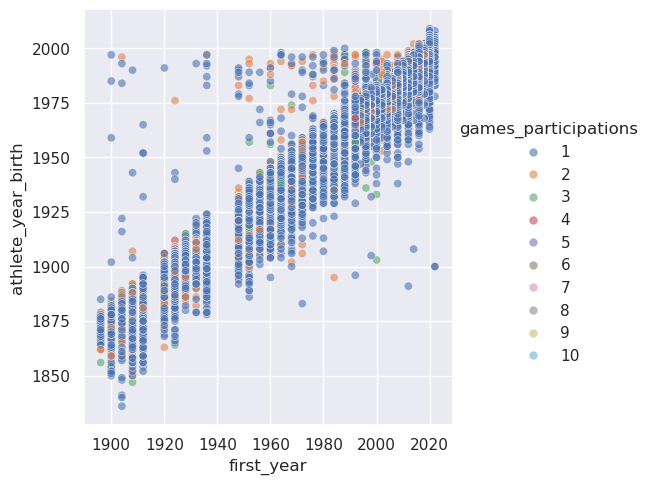

In [58]:
sns.relplot(x='first_year', y='athlete_year_birth', hue='games_participations', palette=sns.color_palette(), data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

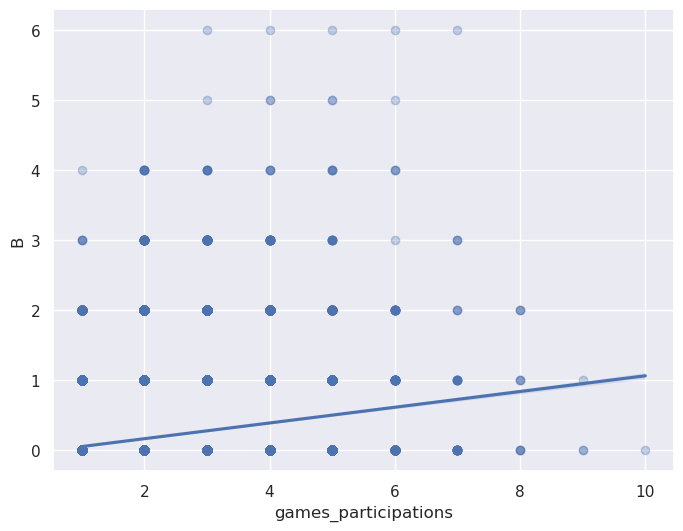

In [59]:
sns.set_theme(style='darkgrid', rc={'figure.figsize':(8, 6)})
sns.regplot(data=df, x="games_participations", y="B", scatter_kws={'alpha':0.3})
plt.show()

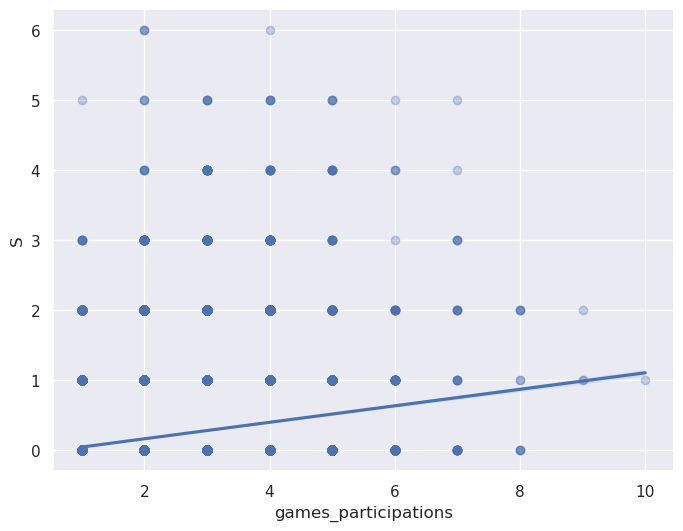

In [60]:
sns.regplot(data=df, x="games_participations", y="S", scatter_kws={'alpha':0.3})
plt.show()

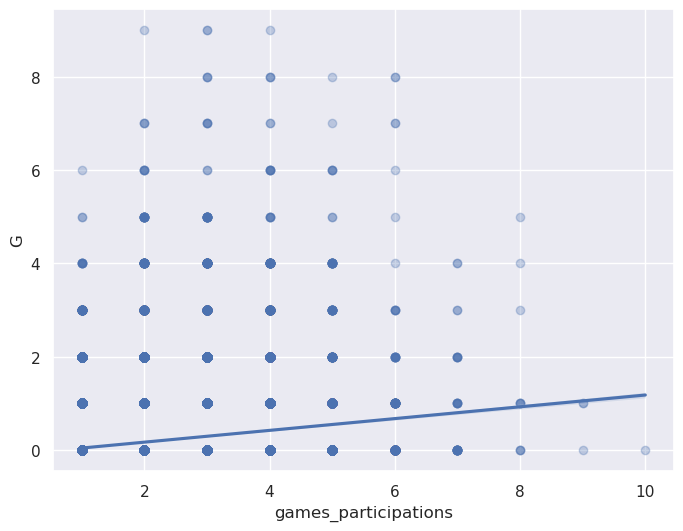

In [61]:
sns.regplot(data=df, x="games_participations", y="G", scatter_kws={'alpha':0.3})
plt.show()

In [62]:
df[df.athlete_year_birth > df.first_year] # Atletas nados despois de participar nos seus primeiros xogos olímpicos (marabillosa xogada)

athlete_url         first_city  \
1004          https://olympics.com/en/athletes/anna-maka           Grenoble   
1130         https://olympics.com/en/athletes/crawford-1             Berlin   
1613   https://olympics.com/en/athletes/timo-juhani-g...           Montreal   
1629             https://olympics.com/en/athletes/lampic        Los Angeles   
1841         https://olympics.com/en/athletes/andersen-1           Sarajevo   
...                                                  ...                ...   
66479    https://olympics.com/en/athletes/jerzy-kowalski               Rome   
70288         https://olympics.com/en/athletes/kang-chen          Barcelona   
70709    https://olympics.com/en/athletes/petar-bozhilov              Seoul   
71488      https://olympics.com/en/athletes/geoff-walker             Moscow   
72866  https://olympics.com/en/athletes/christopher-w...  Cortina d'Ampezzo   

       games_participations  athlete_year_birth  first_year  B  S  G  
1004                      2                1992        1968  0  0  0  
1130                      2                1997        1936  1  0  0  
1613                      5                1987        1976  0  0  0  
1629                      2                1996        1984  0  0  0  
1841                      2                1993        1984  0  0  1  
...                     ...                 ...         ... .. .. ..  
66479                     2                1988        1960  0  0  0  
70288                     1                1993        1992  0  0  0  
70709                     1                2000        1988  0  0  0  
71488                     2                1985        1980  1  0  0  
72866                     1                1972        1956  0  0  0  

[125 rows x 8 columns]

In [63]:
# Eliminamos a estes atletas:
df.drop(df[df.athlete_year_birth > df.first_year].index, axis=0, inplace=True)

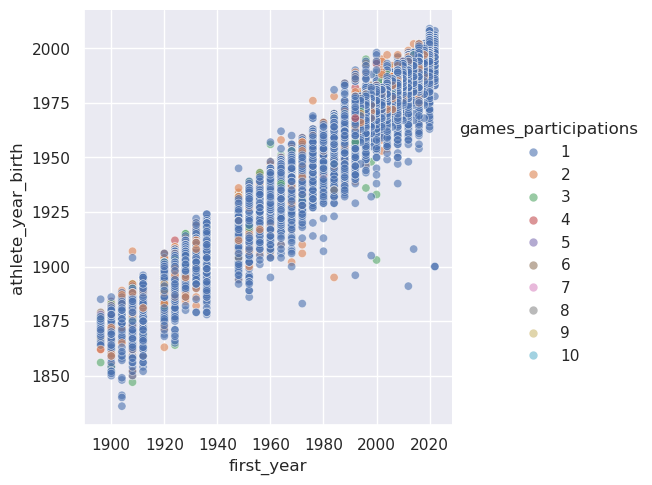

In [64]:
sns.relplot(x='first_year', y='athlete_year_birth', hue='games_participations', palette=sns.color_palette(), data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

In [65]:
# Apréciase que hai atletas que participaron nos seus primeiros xogos cun centenar de anos de idade. Consideráse valor anómalo así que xestiónase a eliminación das liñas correspondentes.
df_idades = pd.DataFrame()
df_idades["idade"] = df["first_year"] - df["athlete_year_birth"]
df_idades.head()

idade
0     22
1     23
2     29
3     27
4     33

(73275, 1)
(70632, 1)


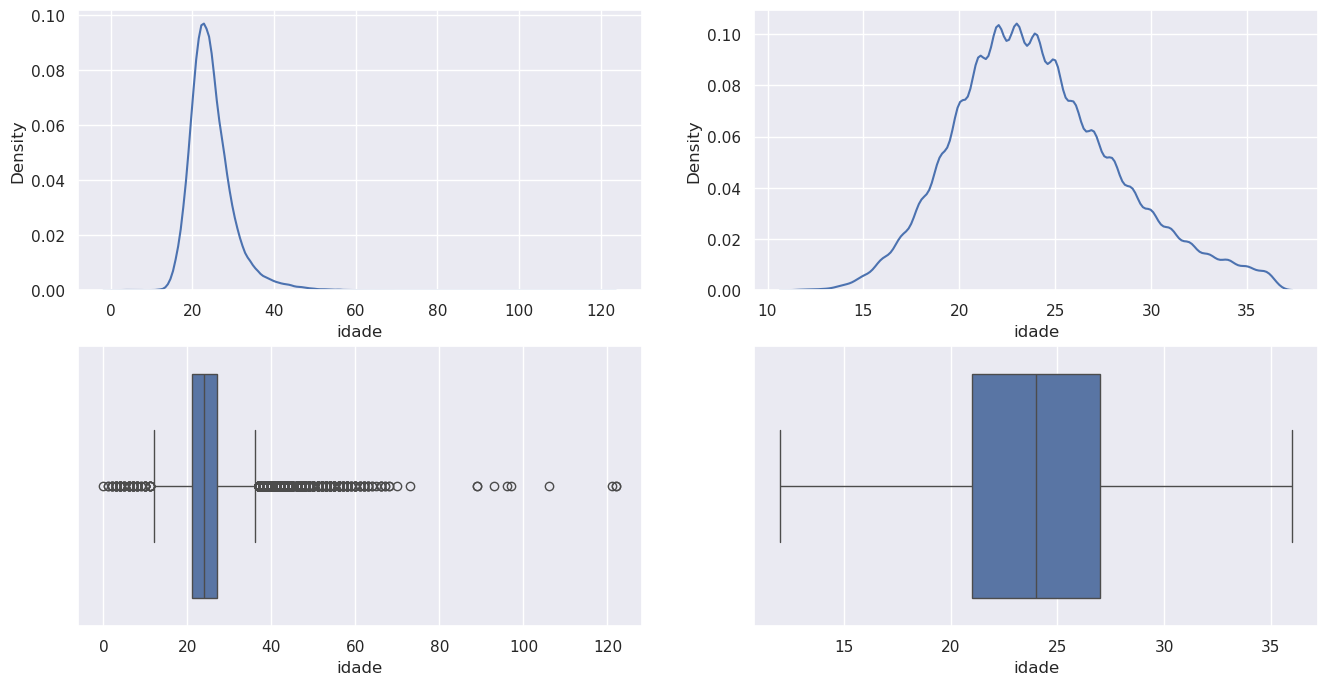

In [66]:
figure, axes = plt.subplots(2,2 ,figsize=(16, 8))
sns.kdeplot(ax=axes[0,0], data=df_idades, x="idade")
sns.boxplot(ax=axes[1,0], data=df_idades, x="idade")
print(df_idades.shape)
Q1, Q3 = df_idades.idade.quantile(0.25), df_idades.idade.quantile(0.75)
IQR = Q3 - Q1
BI, BS = Q1 - IQR * 1.5, Q3 + IQR * 1.5
df_idades = df_idades[(df_idades.idade >= BI) & (df_idades.idade <= BS)]
sns.kdeplot(ax=axes[0,1], data=df_idades, x="idade")
sns.boxplot(ax=axes[1,1], data=df_idades, x="idade")
print(df_idades.shape)

In [67]:
# Tómase a decisión de borrar as filas daquelas persoas cuxa idade de participación no seu primeiro xogo olímpico estean considerados valores anómalos segundo o IQR * 1,5 por enriba e debaixo dos cuartís primeiro e terceiro.
df["idade"] = df["first_year"] - df["athlete_year_birth"]
Q1, Q3 = df.idade.quantile(0.25), df.idade.quantile(0.75)
IQR = Q3 - Q1
BI, BS = Q1 - IQR * 1.5, Q3 + IQR * 1.5
df = df[(df.idade >= BI) & (df.idade <= BS)]
df = df.drop("idade", axis=1)

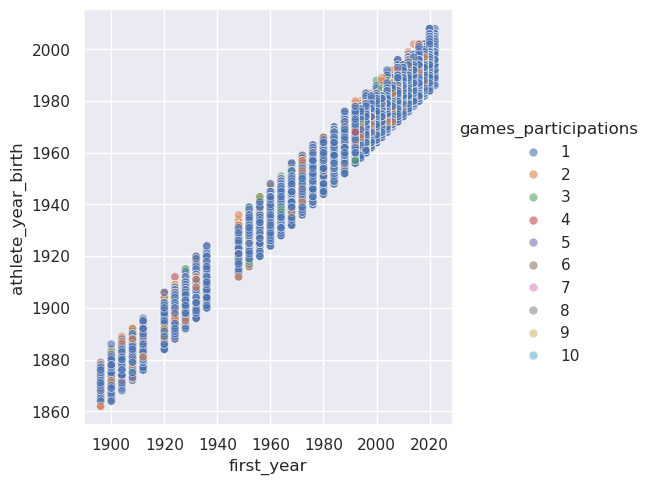

In [68]:
sns.relplot(x='first_year', y='athlete_year_birth', hue='games_participations', palette=sns.color_palette(), data=df, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

In [69]:
df.to_csv('olympic_athletes_last.csv', index=False)

## Olympic medals

In [70]:
df = pd.read_csv("olympic_athletes_last.csv")

In [71]:
olympic_medals.head()

discipline_title     slug_game    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type participant_title  \
0         GameTeam             Italy   
1         GameTeam             Italy   
2         GameTeam            Norway   
3         GameTeam            Norway   
4         GameTeam            Sweden   

                                         athlete_url     athlete_full_name  \
0  https://olympics.com/en/athletes/stefania-cons...  Stefania CONSTANTINI   
1      https://olympics.com/en/athletes/amos-mosaner          Amos MOSANER   
2  https://olympics.com/en/athletes/kristin-skaslien      Kristin SKASLIEN   
3  https://olympics.com/en/athletes/magnus-nedreg...    Magnus NEDREGOTTEN   
4     https://olympics.com/en/athletes/almida-de-val         Almida DE VAL   

  country_name country_code country_3_letter_code  
0        Italy           IT                   ITA  
1        Italy           IT                   ITA  
2       Norway           NO                   NOR  
3       Norway           NO                   NOR  
4       Sweden           SE                   SWE

In [72]:
# Fusionamos o dataframe de atletas co de medallas.
df = df.merge(olympic_medals, left_on="athlete_url", right_on="athlete_url")
# Unha ollada ós datos
df.head()

athlete_url   first_city  \
0       https://olympics.com/en/athletes/matt-graham        Sochi   
1   https://olympics.com/en/athletes/ikuma-horishima  PyeongChang   
2       https://olympics.com/en/athletes/daichi-hara  PyeongChang   
3  https://olympics.com/en/athletes/mikael-kingsbury        Sochi   
4  https://olympics.com/en/athletes/mikael-kingsbury        Sochi   

   games_participations  athlete_year_birth  first_year  B  S  G  \
0                     3                1994        2014  0  1  0   
1                     2                1997        2018  1  0  0   
2                     2                1997        2018  1  0  0   
3                     3                1992        2014  0  2  1   
4                     3                1992        2014  0  2  1   

   discipline_title         slug_game   event_title event_gender medal_type  \
0  Freestyle Skiing  pyeongchang-2018  Men’s Moguls          Men     SILVER   
1  Freestyle Skiing      beijing-2022  Men's Moguls          Men     BRONZE   
2  Freestyle Skiing  pyeongchang-2018  Men’s Moguls          Men     BRONZE   
3  Freestyle Skiing      beijing-2022  Men's Moguls          Men     SILVER   
4  Freestyle Skiing  pyeongchang-2018  Men’s Moguls          Men       GOLD   

  participant_type participant_title athlete_full_name country_name  \
0          Athlete               NaN       Matt GRAHAM    Australia   
1          Athlete               NaN   Ikuma HORISHIMA        Japan   
2          Athlete               NaN       Daichi HARA        Japan   
3          Athlete               NaN  Mikael KINGSBURY       Canada   
4          Athlete               NaN  Mikael KINGSBURY       Canada   

  country_code country_3_letter_code  
0           AU                   AUS  
1           JP                   JPN  
2           JP                   JPN  
3           CA                   CAN  
4           CA                   CAN

## Olympic hosts

In [73]:
olympic_hosts.head()

game_slug         game_end_date       game_start_date  \
0      beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1        tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2  pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3          rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4        sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   

        game_location         game_name game_season  game_year  
0               China      Beijing 2022      Winter       2022  
1               Japan        Tokyo 2020      Summer       2020  
2   Republic of Korea  PyeongChang 2018      Winter       2018  
3              Brazil          Rio 2016      Summer       2016  
4  Russian Federation        Sochi 2014      Winter       2014

In [74]:
# Fusionamos o dataframe de atletas e medallas co de hosts. A documentación indícanos que a columna game_slug serve para enlazalo.
df = df.merge(olympic_hosts, left_on="slug_game", right_on="game_slug")
# Unha ollada ós datos
df.head()

athlete_url   first_city  \
0       https://olympics.com/en/athletes/matt-graham        Sochi   
1       https://olympics.com/en/athletes/daichi-hara  PyeongChang   
2  https://olympics.com/en/athletes/mikael-kingsbury        Sochi   
3     https://olympics.com/en/athletes/nico-porteous  PyeongChang   
4        https://olympics.com/en/athletes/david-wise        Sochi   

   games_participations  athlete_year_birth  first_year  B  S  G  \
0                     3                1994        2014  0  1  0   
1                     2                1997        2018  1  0  0   
2                     3                1992        2014  0  2  1   
3                     2                2001        2018  1  0  1   
4                     3                1990        2014  0  1  2   

   discipline_title         slug_game  ...              country_name  \
0  Freestyle Skiing  pyeongchang-2018  ...                 Australia   
1  Freestyle Skiing  pyeongchang-2018  ...                     Japan   
2  Freestyle Skiing  pyeongchang-2018  ...                    Canada   
3  Freestyle Skiing  pyeongchang-2018  ...               New Zealand   
4  Freestyle Skiing  pyeongchang-2018  ...  United States of America   

  country_code country_3_letter_code         game_slug         game_end_date  \
0           AU                   AUS  pyeongchang-2018  2018-02-25T08:00:00Z   
1           JP                   JPN  pyeongchang-2018  2018-02-25T08:00:00Z   
2           CA                   CAN  pyeongchang-2018  2018-02-25T08:00:00Z   
3           NZ                   NZL  pyeongchang-2018  2018-02-25T08:00:00Z   
4           US                   USA  pyeongchang-2018  2018-02-25T08:00:00Z   

        game_start_date      game_location         game_name game_season  \
0  2018-02-08T23:00:00Z  Republic of Korea  PyeongChang 2018      Winter   
1  2018-02-08T23:00:00Z  Republic of Korea  PyeongChang 2018      Winter   
2  2018-02-08T23:00:00Z  Republic of Korea  PyeongChang 2018      Winter   
3  2018-02-08T23:00:00Z  Republic of Korea  PyeongChang 2018      Winter   
4  2018-02-08T23:00:00Z  Republic of Korea  PyeongChang 2018      Winter   

  game_year  
0      2018  
1      2018  
2      2018  
3      2018  
4      2018  

[5 rows x 26 columns]

## Olympic results

In [75]:
olympic_results.head()

discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_3_letter_code athlete_url  \
0          Italy           IT                   ITA         NaN   
1         Norway           NO                   NOR         NaN   
2         Sweden           SE                   SWE         NaN   
3  Great Britain           GB                   GBR         NaN   
4         Canada           CA                   CAN         NaN   

  athlete_full_name value_unit value_type  
0               NaN        NaN        NaN  
1               NaN        NaN        NaN  
2               NaN        NaN        NaN  
3               NaN        NaN        NaN  
4               NaN        NaN        NaN

In [76]:
# Fusionamos o dataframe de atletas, medallas e hosts co de results. A documentación indícanos que a columna athlete_url serve para enlazalo.
df = df.merge(olympic_results, left_on="athlete_url", right_on="athlete_url")

In [77]:
df.to_csv("super_df.csv", index=False)

# SUPER DF

In [78]:
df = pd.read_csv("super_df.csv")

## PREPROCESAMENTO DE DATOS

In [79]:
# Unha ollada ós datos
df.head()

athlete_url   first_city  \
0  https://olympics.com/en/athletes/matt-graham        Sochi   
1  https://olympics.com/en/athletes/matt-graham        Sochi   
2  https://olympics.com/en/athletes/matt-graham        Sochi   
3  https://olympics.com/en/athletes/daichi-hara  PyeongChang   
4  https://olympics.com/en/athletes/daichi-hara  PyeongChang   

   games_participations  athlete_year_birth  first_year  B  S  G  \
0                     3                1994        2014  0  1  0   
1                     3                1994        2014  0  1  0   
2                     3                1994        2014  0  1  0   
3                     2                1997        2018  1  0  0   
4                     2                1997        2018  1  0  0   

  discipline_title_x       slug_game_x  ... medal_type_y athletes rank_equal  \
0   Freestyle Skiing  pyeongchang-2018  ...          NaN      NaN      False   
1   Freestyle Skiing  pyeongchang-2018  ...       SILVER      NaN        NaN   
2   Freestyle Skiing  pyeongchang-2018  ...          NaN      NaN        NaN   
3   Freestyle Skiing  pyeongchang-2018  ...          NaN      NaN      False   
4   Freestyle Skiing  pyeongchang-2018  ...       BRONZE      NaN        NaN   

  rank_position country_name_y country_code_y country_3_letter_code_y  \
0            29      Australia             AU                     AUS   
1             2      Australia             AU                     AUS   
2             7      Australia             AU                     AUS   
3             7          Japan             JP                     JPN   
4             3          Japan             JP                     JPN   

  athlete_full_name_y value_unit value_type  
0         Matt GRAHAM      65.13     POINTS  
1         Matt GRAHAM      82.57     POINTS  
2         Matt GRAHAM        NaN        NaN  
3         Daichi HARA      76.11     POINTS  
4         Daichi HARA      82.19     POINTS  

[5 rows x 40 columns]

In [80]:
df.shape
# O dataframe ten 52 144 filas e 40 columnas.

(52144, 40)

In [81]:
columnas = df.columns
# Hai columnas repetidas rematadas en _x e _y.
columnas

Index(['athlete_url', 'first_city', 'games_participations',
       'athlete_year_birth', 'first_year', 'B', 'S', 'G', 'discipline_title_x',
       'slug_game_x', 'event_title_x', 'event_gender', 'medal_type_x',
       'participant_type_x', 'participant_title', 'athlete_full_name_x',
       'country_name_x', 'country_code_x', 'country_3_letter_code_x',
       'game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year', 'discipline_title_y',
       'event_title_y', 'slug_game_y', 'participant_type_y', 'medal_type_y',
       'athletes', 'rank_equal', 'rank_position', 'country_name_y',
       'country_code_y', 'country_3_letter_code_y', 'athlete_full_name_y',
       'value_unit', 'value_type'],
      dtype='object')

In [82]:
# Porén, ningunha das columnas "repetidas" contén unicamente os mesmos valores.
for columna in columnas:
    if columna[-1] == "x":
        if columna[:-1] + "y" in columnas:
            print(columna,"\t",len(df[df[columna] != df[columna[:-1] + "y"]]) / len(df))

discipline_title_x 	 0.01733660632095735
slug_game_x 	 0.5411744400122737
event_title_x 	 0.5326595581466708
medal_type_x 	 0.6273013194231359
participant_type_x 	 0.03685946609389383
athlete_full_name_x 	 0.0009588830929733047
country_name_x 	 0.027961030991101563
country_code_x 	 0.09234044185332924
country_3_letter_code_x 	 0.027769254372506904


In [83]:
# Elimínanse aquelas columnas cuxa diferencia entre _x e _y sexa pequena:
df = df.drop(["discipline_title_y","participant_type_y","athlete_full_name_y","country_name_y","country_code_y","country_3_letter_code_y"], axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52144 entries, 0 to 52143
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   athlete_url              52144 non-null  object 
 1   first_city               52144 non-null  object 
 2   games_participations     52144 non-null  int64  
 3   athlete_year_birth       52144 non-null  int64  
 4   first_year               52144 non-null  int64  
 5   B                        52144 non-null  int64  
 6   S                        52144 non-null  int64  
 7   G                        52144 non-null  int64  
 8   discipline_title_x       52144 non-null  object 
 9   slug_game_x              52144 non-null  object 
 10  event_title_x            52144 non-null  object 
 11  event_gender             52144 non-null  object 
 12  medal_type_x             52144 non-null  object 
 13  participant_type_x       52144 non-null  object 
 14  participant_title     

In [85]:
# Consultamos o número de valores diferentes en cada columna
df.nunique(axis=0)

athlete_url                10233
first_city                    43
games_participations           9
athlete_year_birth           146
first_year                    37
B                              7
S                              7
G                             10
discipline_title_x            60
slug_game_x                   53
event_title_x               1128
event_gender                   4
medal_type_x                   3
participant_type_x             2
participant_title            128
athlete_full_name_x        10227
country_name_x               149
country_code_x               139
country_3_letter_code_x      149
game_slug                     53
game_end_date                 53
game_start_date               53
game_location                 26
game_name                     53
game_season                    2
game_year                     37
event_title_y               1077
slug_game_y                   53
medal_type_y                   3
athletes                       0
rank_equal

### TRATAMENTO DE MISSING VALUES

In [86]:
df.loc[:,df.isnull().any()].isna().sum()

participant_title    50222
country_code_x        3531
medal_type_y         23921
athletes             52144
rank_equal           44462
rank_position          427
value_unit           18908
value_type           17031
dtype: int64

In [87]:
# Mostrar as liñas que teñen nan:
df[df.isnull().any(axis=1)]

athlete_url   first_city  \
0           https://olympics.com/en/athletes/matt-graham        Sochi   
1           https://olympics.com/en/athletes/matt-graham        Sochi   
2           https://olympics.com/en/athletes/matt-graham        Sochi   
3           https://olympics.com/en/athletes/daichi-hara  PyeongChang   
4           https://olympics.com/en/athletes/daichi-hara  PyeongChang   
...                                                  ...          ...   
52139  https://olympics.com/en/athletes/pantelis-kara...       Athens   
52140  https://olympics.com/en/athletes/pantelis-kara...       Athens   
52141       https://olympics.com/en/athletes/john-boland       Athens   
52142       https://olympics.com/en/athletes/john-boland       Athens   
52143   https://olympics.com/en/athletes/georgios-tsitas       Athens   

       games_participations  athlete_year_birth  first_year  B  S  G  \
0                         3                1994        2014  0  1  0   
1                         3                1994        2014  0  1  0   
2                         3                1994        2014  0  1  0   
3                         2                1997        2018  1  0  0   
4                         2                1997        2018  1  0  0   
...                     ...                 ...         ... .. .. ..   
52139                     1                1876        1896  0  0  1   
52140                     1                1876        1896  0  0  1   
52141                     1                1870        1896  0  0  2   
52142                     1                1870        1896  0  0  2   
52143                     1                1871        1896  0  1  0   

      discipline_title_x       slug_game_x  ... game_season game_year  \
0       Freestyle Skiing  pyeongchang-2018  ...      Winter      2018   
1       Freestyle Skiing  pyeongchang-2018  ...      Winter      2018   
2       Freestyle Skiing  pyeongchang-2018  ...      Winter      2018   
3       Freestyle Skiing  pyeongchang-2018  ...      Winter      2018   
4       Freestyle Skiing  pyeongchang-2018  ...      Winter      2018   
...                  ...               ...  ...         ...       ...   
52139           Shooting       athens-1896  ...      Summer      1896   
52140           Shooting       athens-1896  ...      Summer      1896   
52141             Tennis       athens-1896  ...      Summer      1896   
52142             Tennis       athens-1896  ...      Summer      1896   
52143          Wrestling       athens-1896  ...      Summer      1896   

                          event_title_y       slug_game_y medal_type_y  \
0                          Men's Moguls      beijing-2022          NaN   
1                          Men’s Moguls  pyeongchang-2018       SILVER   
2                            Moguls men        sochi-2014          NaN   
3                          Men's Moguls      beijing-2022          NaN   
4                          Men’s Moguls  pyeongchang-2018       BRONZE   
...                                 ...               ...          ...   
52139               army rifle 200m men       athens-1896         GOLD   
52140               army rifle 300m men       athens-1896          NaN   
52141                       Singles men       athens-1896         GOLD   
52142                       Singles men       athens-1896         GOLD   
52143  Unlimited Class, Greco-Roman Men       athens-1896       SILVER   

      athletes rank_equal rank_position value_unit value_type  
0          NaN      False            29      65.13     POINTS  
1          NaN        NaN             2      82.57     POINTS  
2          NaN        NaN             7        NaN        NaN  
3          NaN      False             7      76.11     POINTS  
4          NaN        NaN             3      82.19     POINTS  
...        ...        ...           ...        ...        ...  
52139      NaN        NaN             1         40     POINTS  
52140      NaN        NaN

In [88]:
# Proporción de filas con nans
len(df[df.isnull().any(axis=1)]) / len(df) # Todas as liñas teñen como mínimo un nan.

1.0

In [89]:
# Proporción de nans en columnas
df.loc[:,df.isnull().any()].isna().sum() / len(df)

participant_title    0.963141
country_code_x       0.067716
medal_type_y         0.458749
athletes             1.000000
rank_equal           0.852677
rank_position        0.008189
value_unit           0.362611
value_type           0.326615
dtype: float64

In [90]:
# Como son poucas, elimínanse as filas que teñan nans en country_code_x e rank_position.
df = df.dropna(subset=["country_code_x","rank_position"])

In [91]:
# Elimínanse as columnas con proporción de nulls superior á un terzo:
df = df.dropna(axis=1, thresh=df.shape[0]*2/3)
df.loc[:,df.isnull().any()].isna().sum()
# Xa non quedan nans.

Series([], dtype: float64)

In [92]:
df.shape

(48192, 28)

### TRATAMENTO DE DUPLICADOS

In [93]:
# Buscar filas duplicadas
print(f'Total de filas duplicadas: {df.duplicated().sum()}')

Total de filas duplicadas: 13


In [94]:
# Eliminamos os duplicados
df = df.drop_duplicates()
df.shape

(48179, 28)

### OUTRAS COLUMNAS

In [95]:
# rank_position é practicamente numérica; os únicos valores string son:
# * DNF: Did Not Finish
# * YCD: Yellow Card
# * DSQ: Disqualified
# * DNS: Did Not Start
# Podemos eliminar esas liñas e converter a columna en numérica
df.rank_position.unique()

array(['29', '2', '7', '3', '1', '22', '6', '4', '20', '14', '11', '8',
       '5', '15', '24', '27', '10', '16', '12', '9', 'DNF', '17', '18',
       '21', '25', '19', 'YCD', 'DSQ', '28', '13', '26', '23', '32', '30',
       '47', '31', '51', '50', '64', '34', '59', '60', '54', 'DNS', '37',
       '40', '43', '52', '35', '44', '49', '36', '38', '67', '71', '45',
       '33', '53', '39', '48', '55', '68', '41', '42', '63', '61', '46',
       '74', '70', '57', '56', '58', '105', '83', '102', '75', '69', '84',
       '91', '108', '90', '76', '98', '85', '78', '80', '81', '92', '82',
       '110', '93', '115', '73', '77', '166', '162', '117', '104', '123',
       '158', '131', '87', '153', '116', '96', '65', '66', '101', '79',
       '97', '100', '89', '94', '62', '111', '118'], dtype=object)

In [96]:
# A proporción de esas liñas é prescindible.
len(df[(df.rank_position == "DNF") | (df.rank_position == "YCD") | (df.rank_position == "DSQ") | (df.rank_position == "DNS")]) / len(df)

0.043670478839328335

In [97]:
# Elimínanse as liñas:
df = df[(df.rank_position != "DNF") & (df.rank_position != "YCD") & (df.rank_position != "DSQ") & (df.rank_position != "DNS")]

In [98]:
# Convértese o atributo en numérico.
df["rank_position"] = df["rank_position"].apply(lambda x: int(x))

In [99]:
df.describe()

games_participations  athlete_year_birth    first_year             B  \
count          46075.000000        46075.000000  46075.000000  46075.000000   
mean               3.050765         1958.764406   1980.962908      0.986066   
std                1.397931           31.437134     30.431974      1.101297   
min                1.000000         1862.000000   1896.000000      0.000000   
25%                2.000000         1943.000000   1964.000000      0.000000   
50%                3.000000         1969.000000   1992.000000      1.000000   
75%                4.000000         1983.000000   2004.000000      1.000000   
max                9.000000         2008.000000   2022.000000      6.000000   

                  S             G     game_year  rank_position  
count  46075.000000  46075.000000  46075.000000   46075.000000  
mean       1.166251      1.506066   1985.172957       6.991145  
std        1.206997      1.793824     31.304883      10.095815  
min        0.000000      0.000000   1896.000000       1.000000  
25%        0.000000      0.000000   1968.000000       2.000000  
50%        1.000000      1.000000   1996.000000       3.000000  
75%        2.000000      2.000000   2008.000000       8.000000  
max        6.000000      9.000000   2022.000000     166.000000

In [100]:
# Converter en tipo datetime as datas de inicio e remate dos xogos olímpicos
df["game_start_date"] = pd.to_datetime(df["game_start_date"].apply(lambda x: pd.Timestamp(x).date()))
df["game_end_date"] = pd.to_datetime(df["game_end_date"].apply(lambda x: pd.Timestamp(x).date()))

In [101]:
df.nunique().sort_values(ascending=False)
# Elimínanse aquelas columnas que teñan moitas categorías. Tamén elimino algunhas de previa creación propia innecesarias agora:

athlete_url                9626
athlete_full_name_x        9621
event_title_x              1126
event_title_y              1072
athlete_year_birth          146
country_name_x              140
country_3_letter_code_x     140
country_code_x              139
rank_position               112
discipline_title_x           60
slug_game_x                  53
slug_game_y                  53
game_name                    53
game_start_date              53
game_end_date                53
game_slug                    53
first_city                   43
game_year                    37
first_year                   37
game_location                26
G                            10
games_participations          9
S                             7
B                             7
event_gender                  4
medal_type_x                  3
participant_type_x            2
game_season                   2
dtype: int64

In [102]:
df = df.drop(["athlete_url","athlete_full_name_x","event_title_x","event_title_y","country_name_x",
"country_3_letter_code_x","country_code_x","game_slug","slug_game_y","game_name","slug_game_x",
"first_city","game_location","B","S","G"], axis=1)

In [103]:
# Cambiamos os nomes das columnas que rematan en x:
df = df.rename({"discipline_title_x":"discipline_title", "medal_type_x":"medal_type", "participant_type_x":"participant_type"}, axis=1)

In [104]:
# Creamos dúas listas diferentes:
# - nomes das columnas categóricas
# - nomes das columnas numéricas 
# Isto facilitará o tratamento das diferentes variables por separado

cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['discipline_title', 'event_gender', 'medal_type', 'participant_type', 'game_season']
Variables numéricas: ['games_participations', 'athlete_year_birth', 'first_year', 'game_end_date', 'game_start_date', 'game_year', 'rank_position']


In [105]:
# Podemos agrupar as variables por tipo por comodidade (recolocar as columnas)
# bloque categóticas vs bloque numéricas
df = pd.concat((df[cats], df[nums]), axis=1)
df.head()

discipline_title event_gender medal_type participant_type game_season  \
0  Freestyle Skiing          Men     SILVER          Athlete      Winter   
1  Freestyle Skiing          Men     SILVER          Athlete      Winter   
2  Freestyle Skiing          Men     SILVER          Athlete      Winter   
3  Freestyle Skiing          Men     BRONZE          Athlete      Winter   
4  Freestyle Skiing          Men     BRONZE          Athlete      Winter   

   games_participations  athlete_year_birth  first_year game_end_date  \
0                     3                1994        2014    2018-02-25   
1                     3                1994        2014    2018-02-25   
2                     3                1994        2014    2018-02-25   
3                     2                1997        2018    2018-02-25   
4                     2                1997        2018    2018-02-25   

  game_start_date  game_year  rank_position  
0      2018-02-08       2018             29  
1      2018-02-08       2018              2  
2      2018-02-08       2018              7  
3      2018-02-08       2018              7  
4      2018-02-08       2018              3

In [106]:
# Pode ser unha boa idea gardar os datos unha vez limpos e preprocesados
df.to_csv('super_df_cleaned.csv',index=False)

## ANÁLISE DOS VALORES CATEGÓRICOS

In [107]:
df = pd.read_csv("super_df_cleaned.csv")

In [108]:
print(f'categorical variables: {cats}')

categorical variables: ['discipline_title', 'event_gender', 'medal_type', 'participant_type', 'game_season']


In [109]:
# Creamos un novo dataframe só coas variables categóricas

df_cat= df[cats]
df_cat.head()

discipline_title event_gender medal_type participant_type game_season
0  Freestyle Skiing          Men     SILVER          Athlete      Winter
1  Freestyle Skiing          Men     SILVER          Athlete      Winter
2  Freestyle Skiing          Men     SILVER          Athlete      Winter
3  Freestyle Skiing          Men     BRONZE          Athlete      Winter
4  Freestyle Skiing          Men     BRONZE          Athlete      Winter

In [110]:
# Botar unha ollada aos valores das categorías
for col in cats:
    print(f"Categorías en {col}: {pd.unique(df_cat[col])}")

Categorías en discipline_title: ['Freestyle Skiing' 'Short Track' 'Short Track Speed Skating' 'Snowboard'
 'Alpine Skiing' 'Ski Jumping' 'Figure skating' 'Luge' 'Biathlon'
 'Skeleton' 'Cross Country Skiing' 'Speed skating' 'Nordic Combined'
 'Bobsleigh' 'Athletics' 'Cycling Road' 'Cycling Track' 'Shooting'
 'Diving' 'Canoe Sprint' 'Boxing' 'Cycling BMX Racing' 'Cycling BMX'
 'Triathlon' 'Surfing' 'Table Tennis' 'Canoe Slalom' 'Marathon Swimming'
 'Swimming' 'Trampoline Gymnastics' 'Trampoline' 'Taekwondo' 'Fencing'
 'Badminton' 'Sport Climbing' 'Wrestling' 'Tennis' 'Artistic Gymnastics'
 'Gymnastics Artistic' 'Golf' 'Cycling BMX Freestyle' 'Judo'
 'Skateboarding' 'Archery' 'Weightlifting' 'Equestrian'
 'Equestrian Eventing' 'Equestrian Dressage' 'Equestrian Jumping'
 'Modern Pentathlon' 'Sailing' 'Cycling Mountain Bike' 'Rowing' 'Karate'
 'Rhythmic Gymnastics' 'Gymnastics Rhythmic' 'Synchronized Swimming'
 'Canoe Marathon' 'Jeu de Paume' 'Rackets']
Categorías en event_gender: ['Men' 'W

In [111]:
df_cat.describe()

discipline_title event_gender medal_type participant_type game_season
count             46075        46075      46075            46075       46075
unique               60            4          3                2           2
top           Athletics          Men       GOLD          Athlete      Summer
freq               5860        28876      16121            44259       32125

Análise da distribución

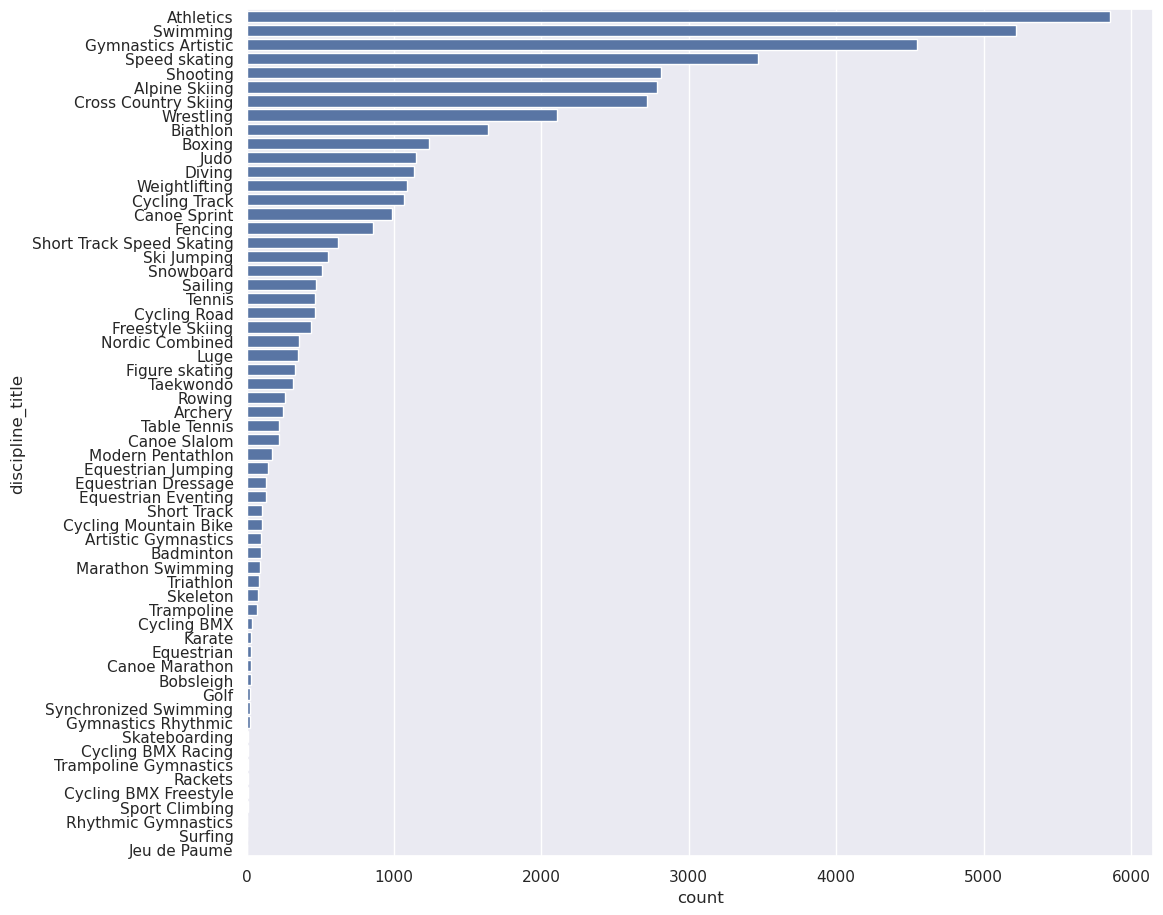

In [112]:
# Countplot pode ser unha boa opción para ver como se distribúen os datos nas variables categóricas
sns.set_theme(style='darkgrid', rc={'figure.figsize':(11.7,11)})

# Distribución de "discipline_title"
sns.countplot(data=df_cat, y='discipline_title', order=df_cat['discipline_title'].value_counts().index)
plt.show()

In [113]:
# o 10 % de disciplinas (6 de 60) abarca o 53 % das filas: distribución non uniforme
cantidade = 6
df_cat.discipline_title.value_counts()[:cantidade].sum() / df_cat.discipline_title.count(), cantidade / len(df_cat.discipline_title.unique())

(0.5360173629951167, 0.1)

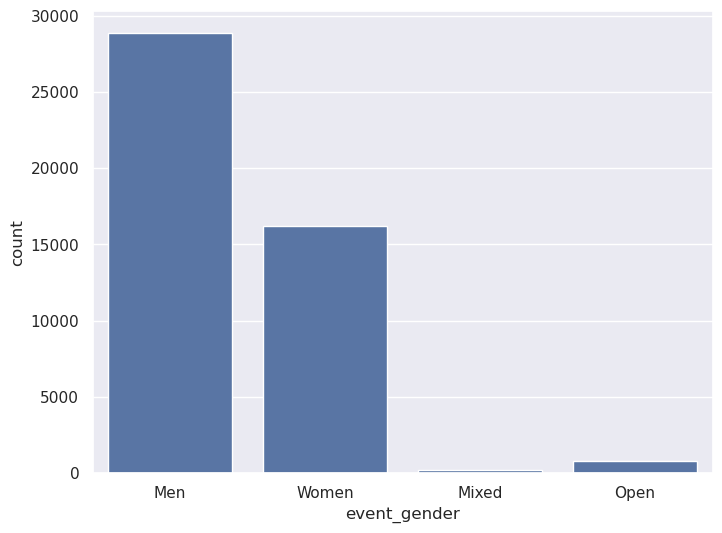

In [114]:
# Distribución de "orixe"
sns.set_theme(style='darkgrid', rc={'figure.figsize':(8, 6)})
sns.countplot(data=df_cat, x='event_gender')
plt.show()

In [115]:
# O máis común son eventos con xénero Men. Os eventos de xénero Mixed e Open son anecdóticos.

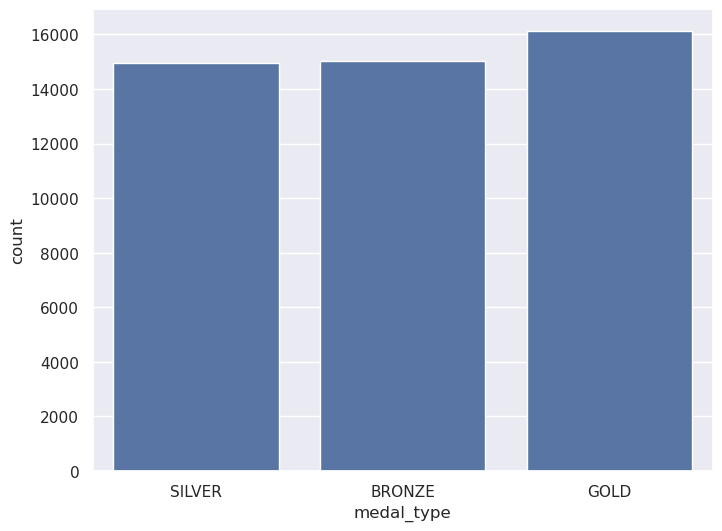

In [116]:
# Distribución dos datos segundo "medal_type"
sns.countplot(data=df_cat,x='medal_type')
plt.show()

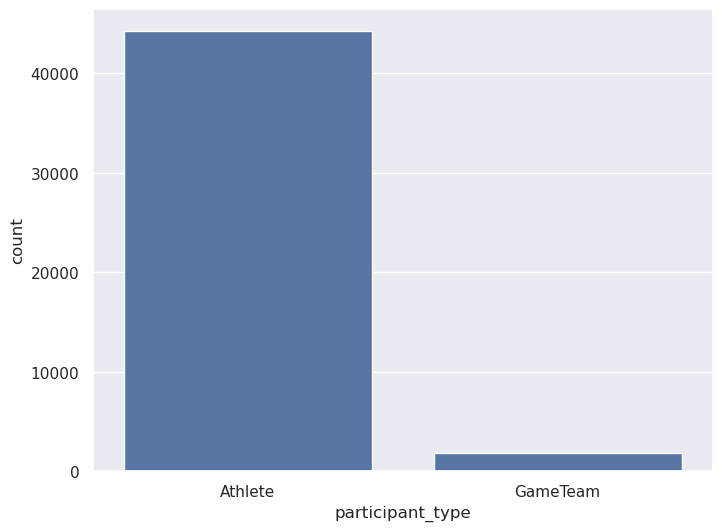

In [117]:
# Distribución dos datos segundo "participant_type"
sns.countplot(data=df_cat,x='participant_type')
plt.show()

In [118]:
# O máis común son participacións de tipo con Athlete. As participacións de tipo GameTeam son anecdóticas.

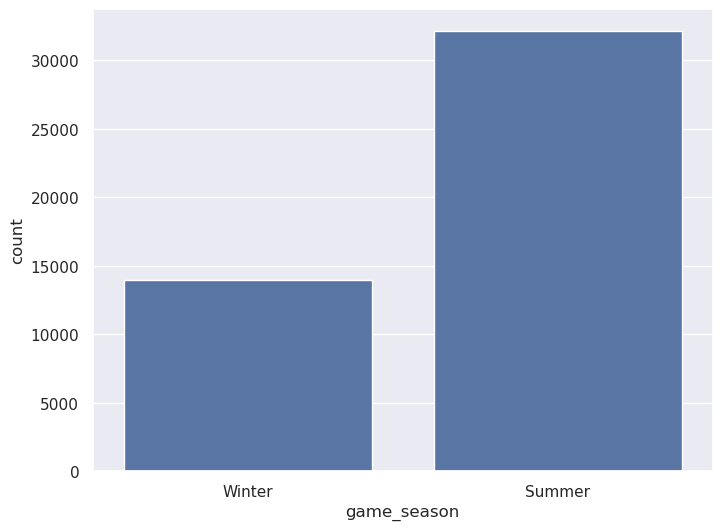

In [119]:
# Distribución dos datos segundo "game_season"
sns.countplot(data=df_cat,x='game_season')
plt.show()

In [120]:
# O máis común son xogso de temporada de verán, pero as de inverno non se quedan atrás.

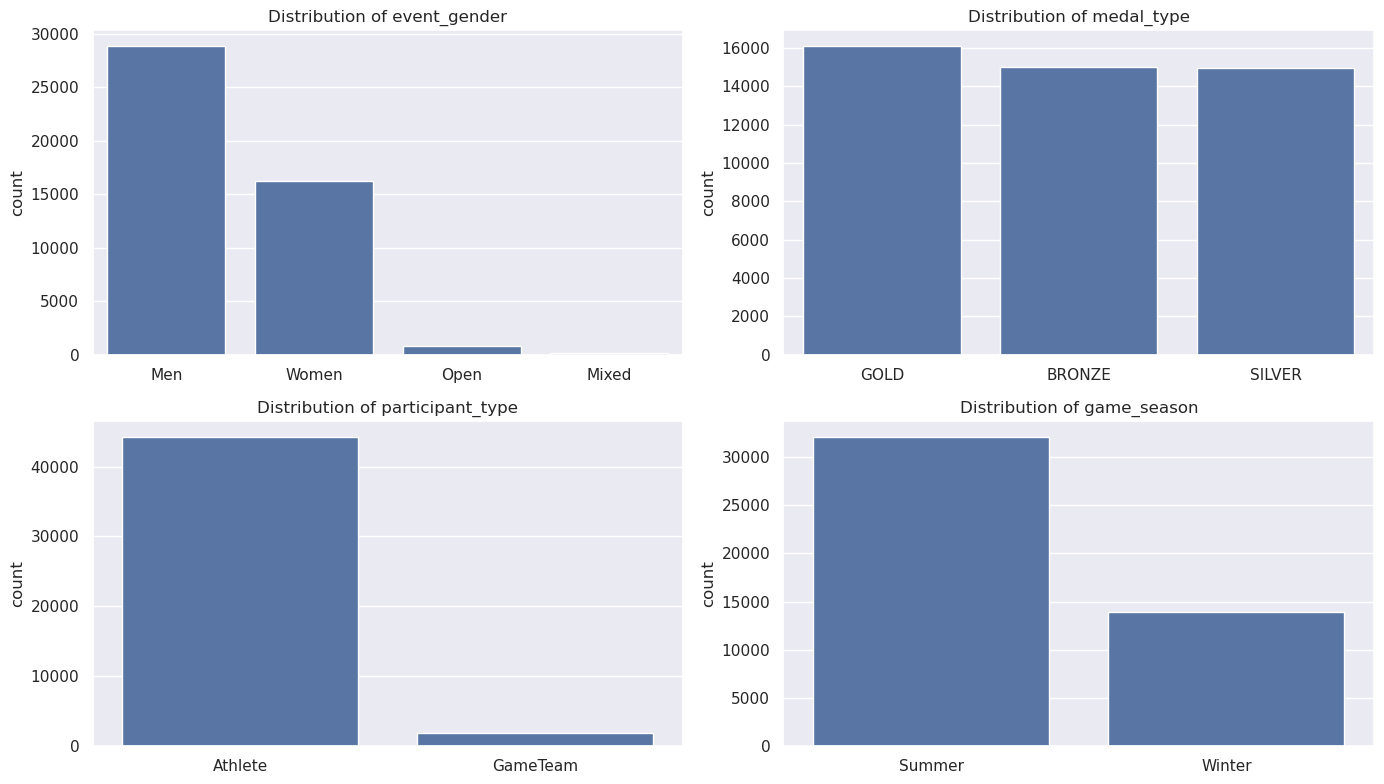

In [121]:
# Podemos agrupar as gráficas.
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.drop(['discipline_title'], axis=1).columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(data=df_cat,x=cat, order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [122]:
# Cálculo da proporción das clases dominantes en relación co resto da súa categoría
for i,cat in enumerate(df_cat.drop(['discipline_title'], axis=1).columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / df.shape[0]
    print(f'`{val_counts.index[0]}` contribúe por si soa nun {round(dominant_frac * 100, 2)}% de {cat}')

`Men` contribúe por si soa nun 62.67% de event_gender
`GOLD` contribúe por si soa nun 34.99% de medal_type
`Athlete` contribúe por si soa nun 96.06% de participant_type
`Summer` contribúe por si soa nun 69.72% de game_season


In [123]:
# NOVA INFORMACIÓN EXTRAÍDA DA ANÁLISE  -- Insights

# - discipline_title desequilibrado en favor do 10 % máis común (6 de 60), cuxa suma suma máis que a suma dos seus competidores.
# - event_gender desequilibrado en favor de Men, maior que a suma dos competidores
# - medal_type -> equilibrado
# - participant_type desequilibrado en favor de Athlete, maior que a suma dos competidores
# - game_season desequilibrado en favor de Summer, maior que o seu único competidor en dobre

In [124]:
# CONCLUSIÓNS

# * Todos os atributos categóricos (excepto medal_type) están moi desbalanceados e lonxe da distribución uniforme.
# * Todos os atributos categóricos concéntranse en poucas categorías.

PROCURA DE RELACIÓNS ENTRE VARIABLES CATEGÓRICAS

In [125]:
df_cat.nunique()

discipline_title    60
event_gender         4
medal_type           3
participant_type     2
game_season          2
dtype: int64

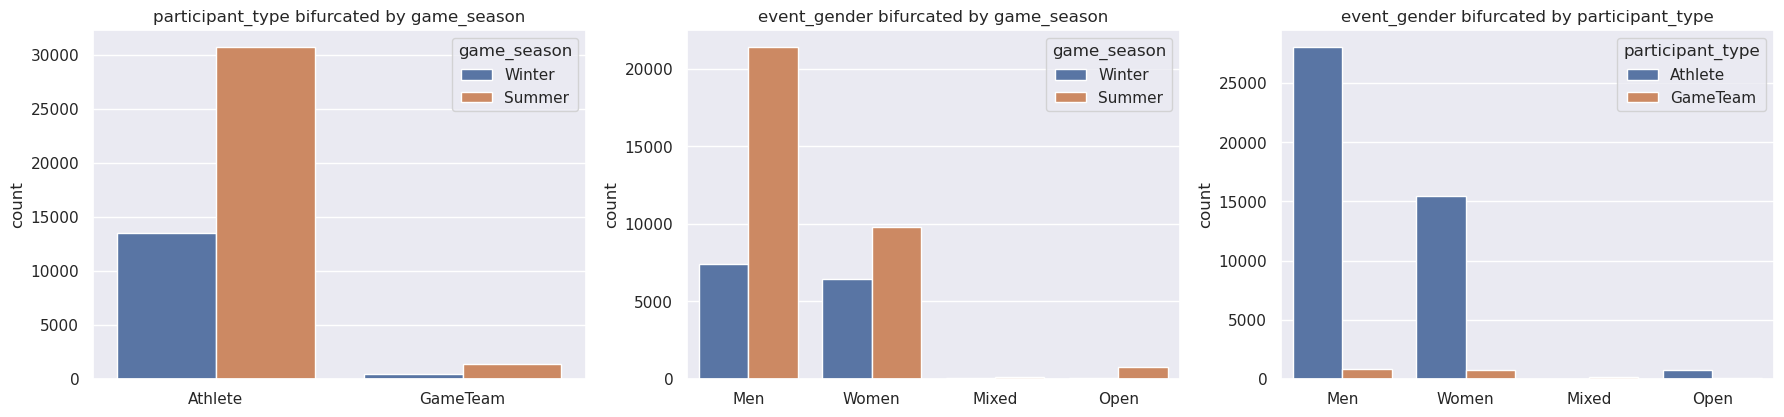

In [126]:
import itertools
combos = itertools.combinations(['game_season', 'participant_type', 'event_gender'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

In [127]:
# CONCLUSIÓNS - Insights

# Pode apreciarse o desvalanceo das categorías

**Tipo de participante por temporada**
* Tanto en xogo individual como en xogo por equipos, en verano hai máis medallas que en inverno, cunha diferenza do dobre.

**Xénero de evento por temporada**
* Apenas hai eventos de xénero Mixed en ambas temporadas.
* En inverno case non hai eventos de xénero Open, e en verán son poucos.
* Nos xogos de inverno hai maior equilibrio entre os xéneros de evento Men e Women; en verán hai unha clara vantaxe en cantidade de eventos de xénero Men con respecto a Women.

**Xénero de evento por tipo de participante**
* Só se aprecia algo de xogo en equipo nos xéneros de evento Men e Women; apenas hai en Mixed e Open.
* Nos xéneros de evento Men, Women e Open a proporción de participante tipo Athlete é considerable con respecto á de tipo GameTeam.

**Análise de cruzado das tres variables**

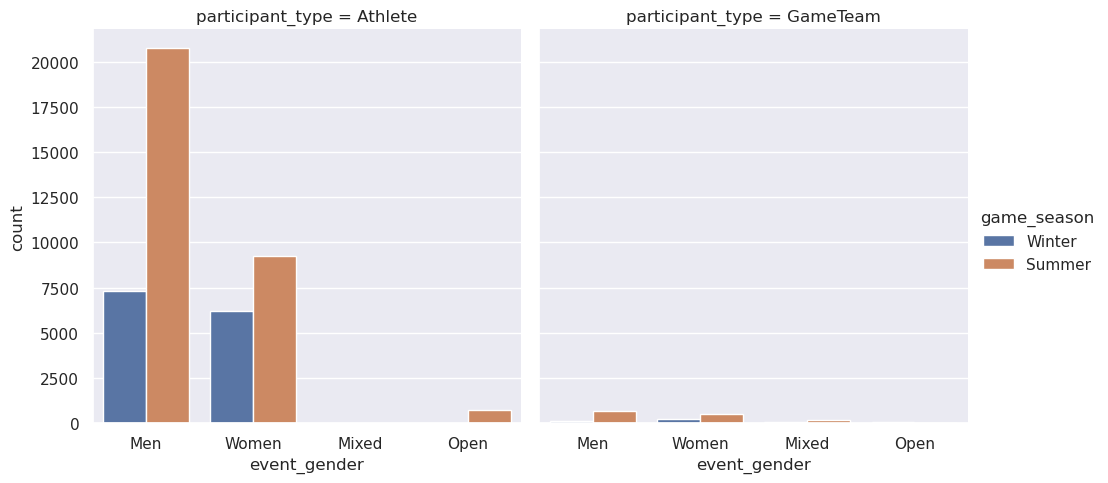

In [128]:
sns.catplot(x='event_gender', hue='game_season', col='participant_type', data=df_cat, kind='count')
plt.show()

**Insights**
- GameTeam participant_type non ten Open event_gender.
- Athlete participant_type ten Open event_gender pero só en verán.
- Athlete participant_type non ten Mixed event_gender.
- GameTeam participant_type ten Mixed event_gender pero só en verán.
- Case non hai GameTeam participant_type en inverno; e o que hai é de Women event_gender.
- Case non hai GameTeam participant_type para Men event_gender, e o que hai é de verán.
- Están moi ben representados, aínda que en desequilibrio, os event_gender Men e Women no Athlete participant_type, máis equilibrados en inverno que en verán.

**Conclusións**
- Para gozar de Open event_gender, mellor Athlete participant_type.
- Para gozar de Mixed event_gender, mellor GameTeam participan_type.
- Para gozar dunha igualdade de xénero real, mellor xogos de inverno.
- Para ver moitos atletas individuais, mellor xogos de verán.

Análise de `medal_type`.

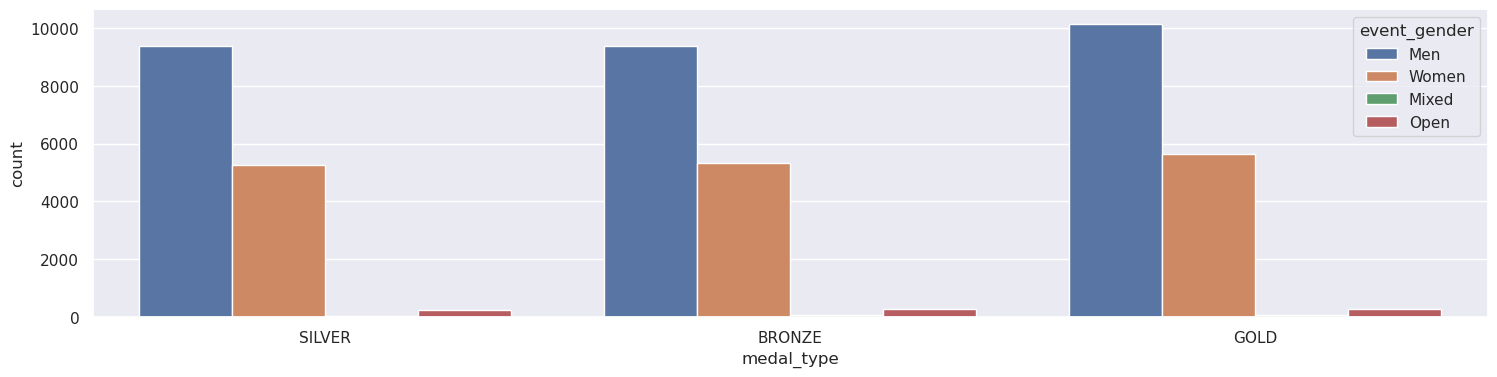

In [129]:
fig = plt.figure(1, (18,4))
sns.countplot(x='medal_type', hue='event_gender', data=df_cat)
plt.show()

**Insights**
- O número de medallas de Men event_gender é maior que a suma dos demais xéneros de eventos.
- Mantense a proporción de medallas de todos os tipos (BRONZE, SILVER, GOLD), só varían segundo o xénero do evento.

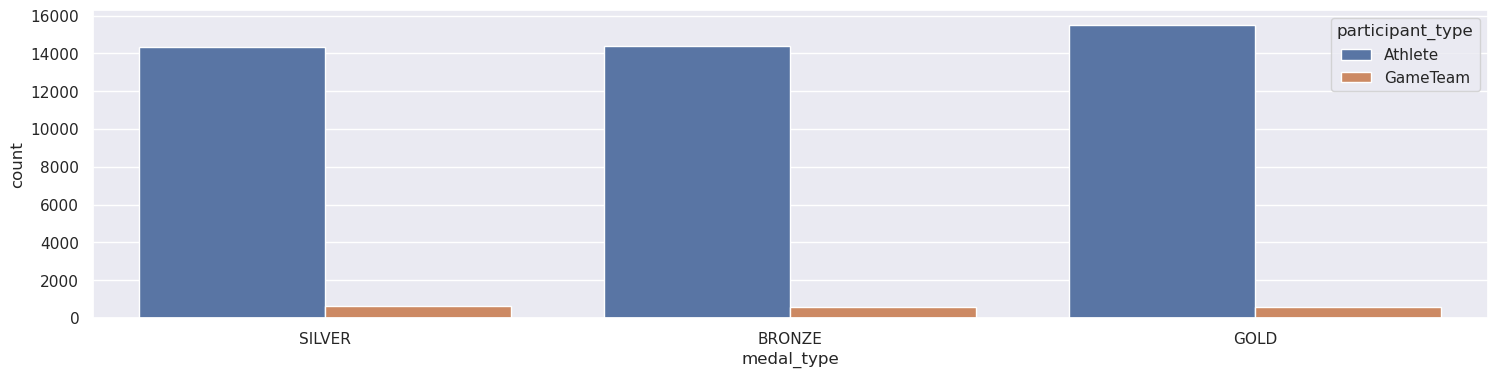

In [130]:
fig = plt.figure(1, (18,4))
sns.countplot(x='medal_type', hue='participant_type', data=df_cat)
plt.show()

**Insights**
- O número de medallas de Athlete participant_type é moito maior que o número de medallas de GameTeam participant_type, independentemente do tipo de medalla.
- Mantense a proporción de medallas de todos os tipos (BRONZE, SILVER, GOLD), só varían segundo o tipo de participante.

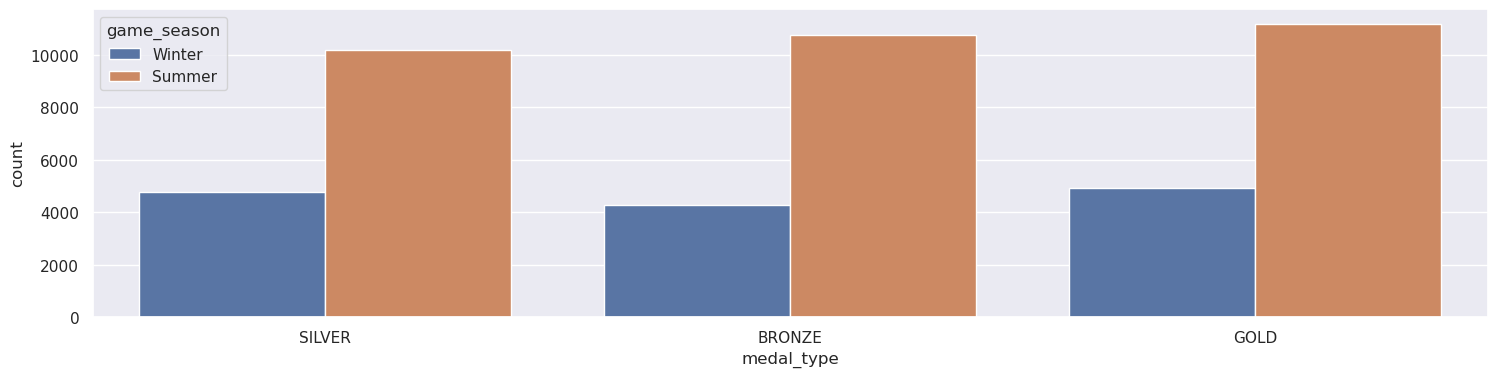

In [131]:
fig = plt.figure(1, (18,4))
sns.countplot(x='medal_type', hue='game_season', data=df_cat)
plt.show()

**Insights**
- Hai o dobre de medallas de todos os tipos en verán que en inverno.
- Mantense a proporción de medallas de todos os tipos (BRONZE, SILVER, GOLD), só varían segundo a estación (verán ou inverno).

Análise de `discipline_title`.

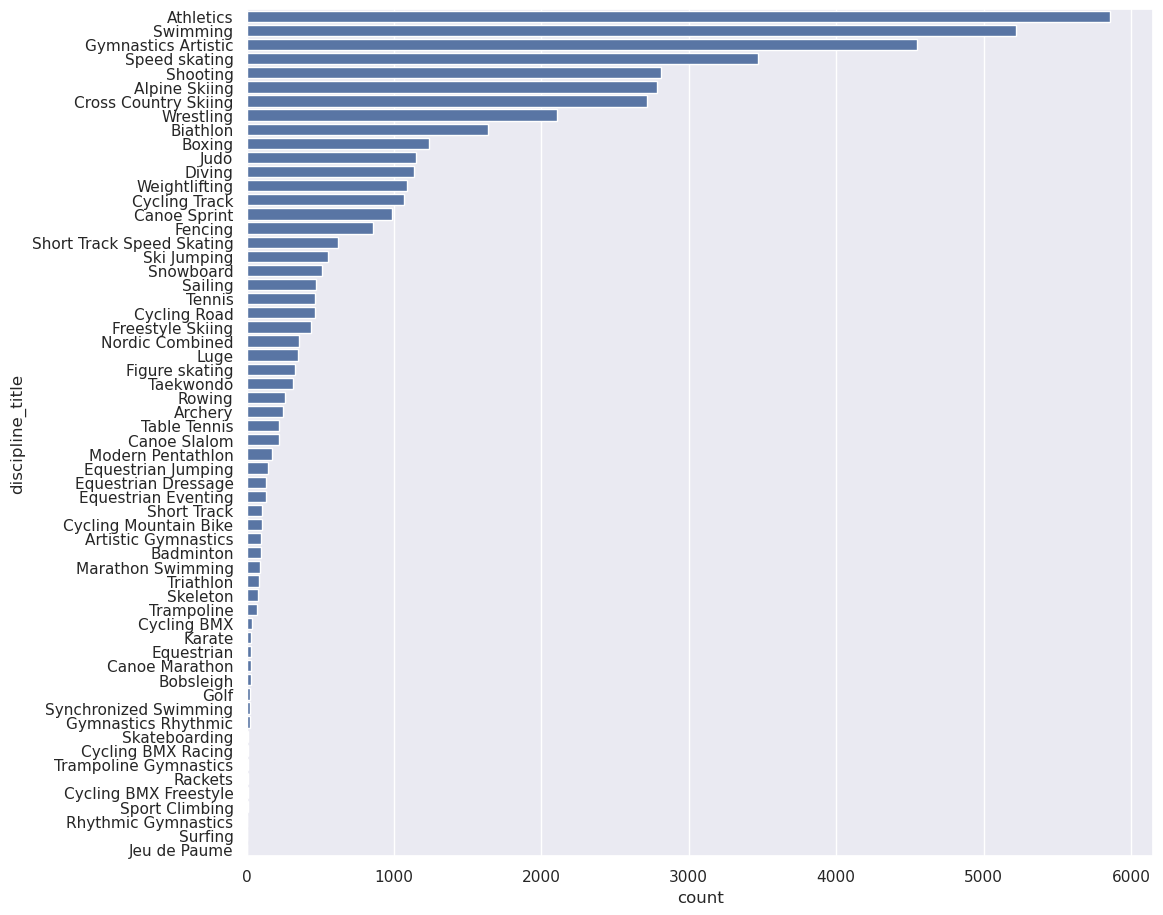

In [132]:
# Lembramos que o 10 % de disciplinas contén o 53 % das filas.
sns.set_theme(style='darkgrid', rc={'figure.figsize':(11.7,11)})
sns.countplot(data=df_cat, y='discipline_title', order=df_cat['discipline_title'].value_counts().index)
plt.show()

In [133]:
#Seleccionamos só un subconxunto das disciplinas máis habituais
top_disciplines = df_cat.discipline_title.value_counts()[:6].index
top_disciplines

Index(['Athletics', 'Swimming', 'Gymnastics Artistic', 'Speed skating',
       'Shooting', 'Alpine Skiing'],
      dtype='object', name='discipline_title')

In [134]:
df_cat_top_disciplines = df_cat[df_cat.discipline_title.isin(top_disciplines)]
df_cat_top_disciplines.shape

(24697, 5)

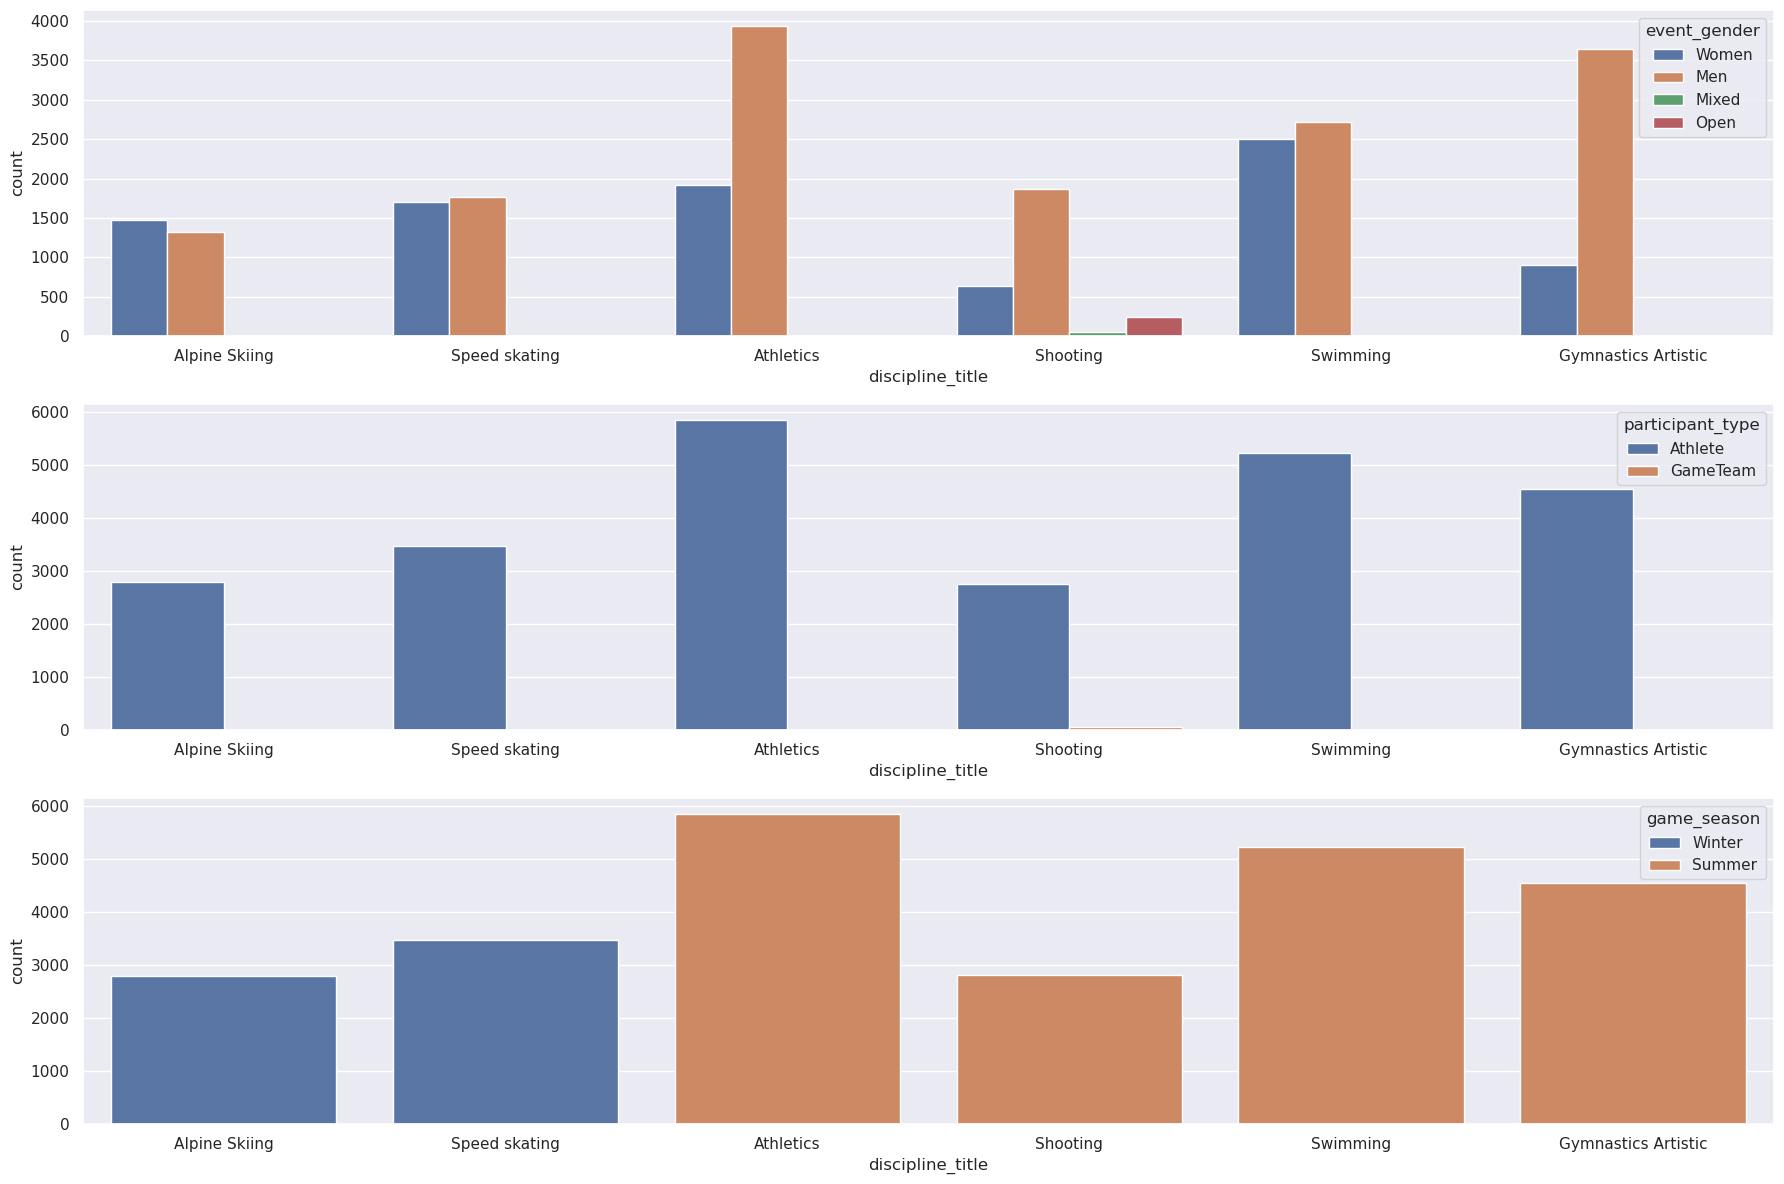

In [135]:
fig = plt.figure(1, (18,12))

for i,cat in enumerate(['event_gender', 'participant_type', 'game_season']):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x='discipline_title', hue=cat, data=df_cat_top_disciplines)
    plt.tight_layout()

In [136]:
# Sospeita: as disciplinas teñen unha clasificación binaria segundo a tempada
for d in df_cat.discipline_title.unique():
    if df_cat[df_cat.discipline_title == d].game_season.nunique() == 2:
        print(d)

Figure skating


In [137]:
# Figure skating desmínteo.
df_cat[df_cat.discipline_title == "Figure skating"].game_season.value_counts()

game_season
Winter    310
Summer     19
Name: count, dtype: int64

**Insights**
- Alpine Skiing, Speed skating e Swimming están bastante equilibrados entre Women e Men no event_gender.
- Athletics e Gymnastics Artistic están moi desequilibrados en favor de Men no event_gender.
- Shooting é, destas 6 disciplinas, a única que ten presencia de Mixed e Open no event_gender, aínda que é case anecdótico. Nesta disciplina tamén hai unha maioría de Men fronte a suma 
- Shooting é, destas 6 disciplinas, a única que ten presencia de GameTeam participant_type, aínda que é anecdótico. O resto de disciplinas só mostran Athlete participant_type.
- Alpine Skiing e Speed skating son integramente de inverno. Por outra parte, Athletics, Shooting, Swimming e Gymnastics Artistic son integramente de verán.
Sospeitouse que todas as disciplinas son integramente ou ben de inverno ou ben de verán. Porén, Figure skating desmínteo.

## ANÁLISE DOS VALORES NUMÉRICOS

In [138]:
df = pd.read_csv("super_df_cleaned.csv")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46075 entries, 0 to 46074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   discipline_title      46075 non-null  object
 1   event_gender          46075 non-null  object
 2   medal_type            46075 non-null  object
 3   participant_type      46075 non-null  object
 4   game_season           46075 non-null  object
 5   games_participations  46075 non-null  int64 
 6   athlete_year_birth    46075 non-null  int64 
 7   first_year            46075 non-null  int64 
 8   game_end_date         46075 non-null  object
 9   game_start_date       46075 non-null  object
 10  game_year             46075 non-null  int64 
 11  rank_position         46075 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.2+ MB


In [140]:
# Hai que volver a converter en tipo datetime as datas:
df["game_start_date"] = pd.to_datetime(df["game_start_date"])
df["game_end_date"] = pd.to_datetime(df["game_end_date"])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46075 entries, 0 to 46074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   discipline_title      46075 non-null  object        
 1   event_gender          46075 non-null  object        
 2   medal_type            46075 non-null  object        
 3   participant_type      46075 non-null  object        
 4   game_season           46075 non-null  object        
 5   games_participations  46075 non-null  int64         
 6   athlete_year_birth    46075 non-null  int64         
 7   first_year            46075 non-null  int64         
 8   game_end_date         46075 non-null  datetime64[ns]
 9   game_start_date       46075 non-null  datetime64[ns]
 10  game_year             46075 non-null  int64         
 11  rank_position         46075 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 4.2+ MB


In [142]:
print(f'Variables numéricas: {nums}')

Variables numéricas: ['games_participations', 'athlete_year_birth', 'first_year', 'game_end_date', 'game_start_date', 'game_year', 'rank_position']


In [143]:
# Creamos un novo dataframe só coas variables numéricas

df_num = df[nums]
df_num.head()

games_participations  athlete_year_birth  first_year game_end_date  \
0                     3                1994        2014    2018-02-25   
1                     3                1994        2014    2018-02-25   
2                     3                1994        2014    2018-02-25   
3                     2                1997        2018    2018-02-25   
4                     2                1997        2018    2018-02-25   

  game_start_date  game_year  rank_position  
0      2018-02-08       2018             29  
1      2018-02-08       2018              2  
2      2018-02-08       2018              7  
3      2018-02-08       2018              7  
4      2018-02-08       2018              3

In [144]:
df_num.describe()

games_participations  athlete_year_birth    first_year  \
count          46075.000000        46075.000000  46075.000000   
mean               3.050765         1958.764406   1980.962908   
min                1.000000         1862.000000   1896.000000   
25%                2.000000         1943.000000   1964.000000   
50%                3.000000         1969.000000   1992.000000   
75%                4.000000         1983.000000   2004.000000   
max                9.000000         2008.000000   2022.000000   
std                1.397931           31.437134     30.431974   

                       game_end_date                game_start_date  \
count                          46075                          46075   
mean   1985-09-18 10:31:58.489419456  1985-08-25 08:33:29.593054784   
min              1896-04-15 00:00:00            1896-04-06 00:00:00   
25%              1968-10-28 00:00:00            1968-10-12 00:00:00   
50%              1996-08-05 00:00:00            1996-07-19 00:00:00   
75%              2008-08-24 00:00:00            2008-08-08 00:00:00   
max              2022-02-20 00:00:00            2022-02-04 00:00:00   
std                              NaN                            NaN   

          game_year  rank_position  
count  46075.000000   46075.000000  
mean    1985.172957       6.991145  
min     1896.000000       1.000000  
25%     1968.000000       2.000000  
50%     1996.000000       3.000000  
75%     2008.000000       8.000000  
max     2022.000000     166.000000  
std       31.304883      10.095815

Análise de distribución dos atributos numéricos

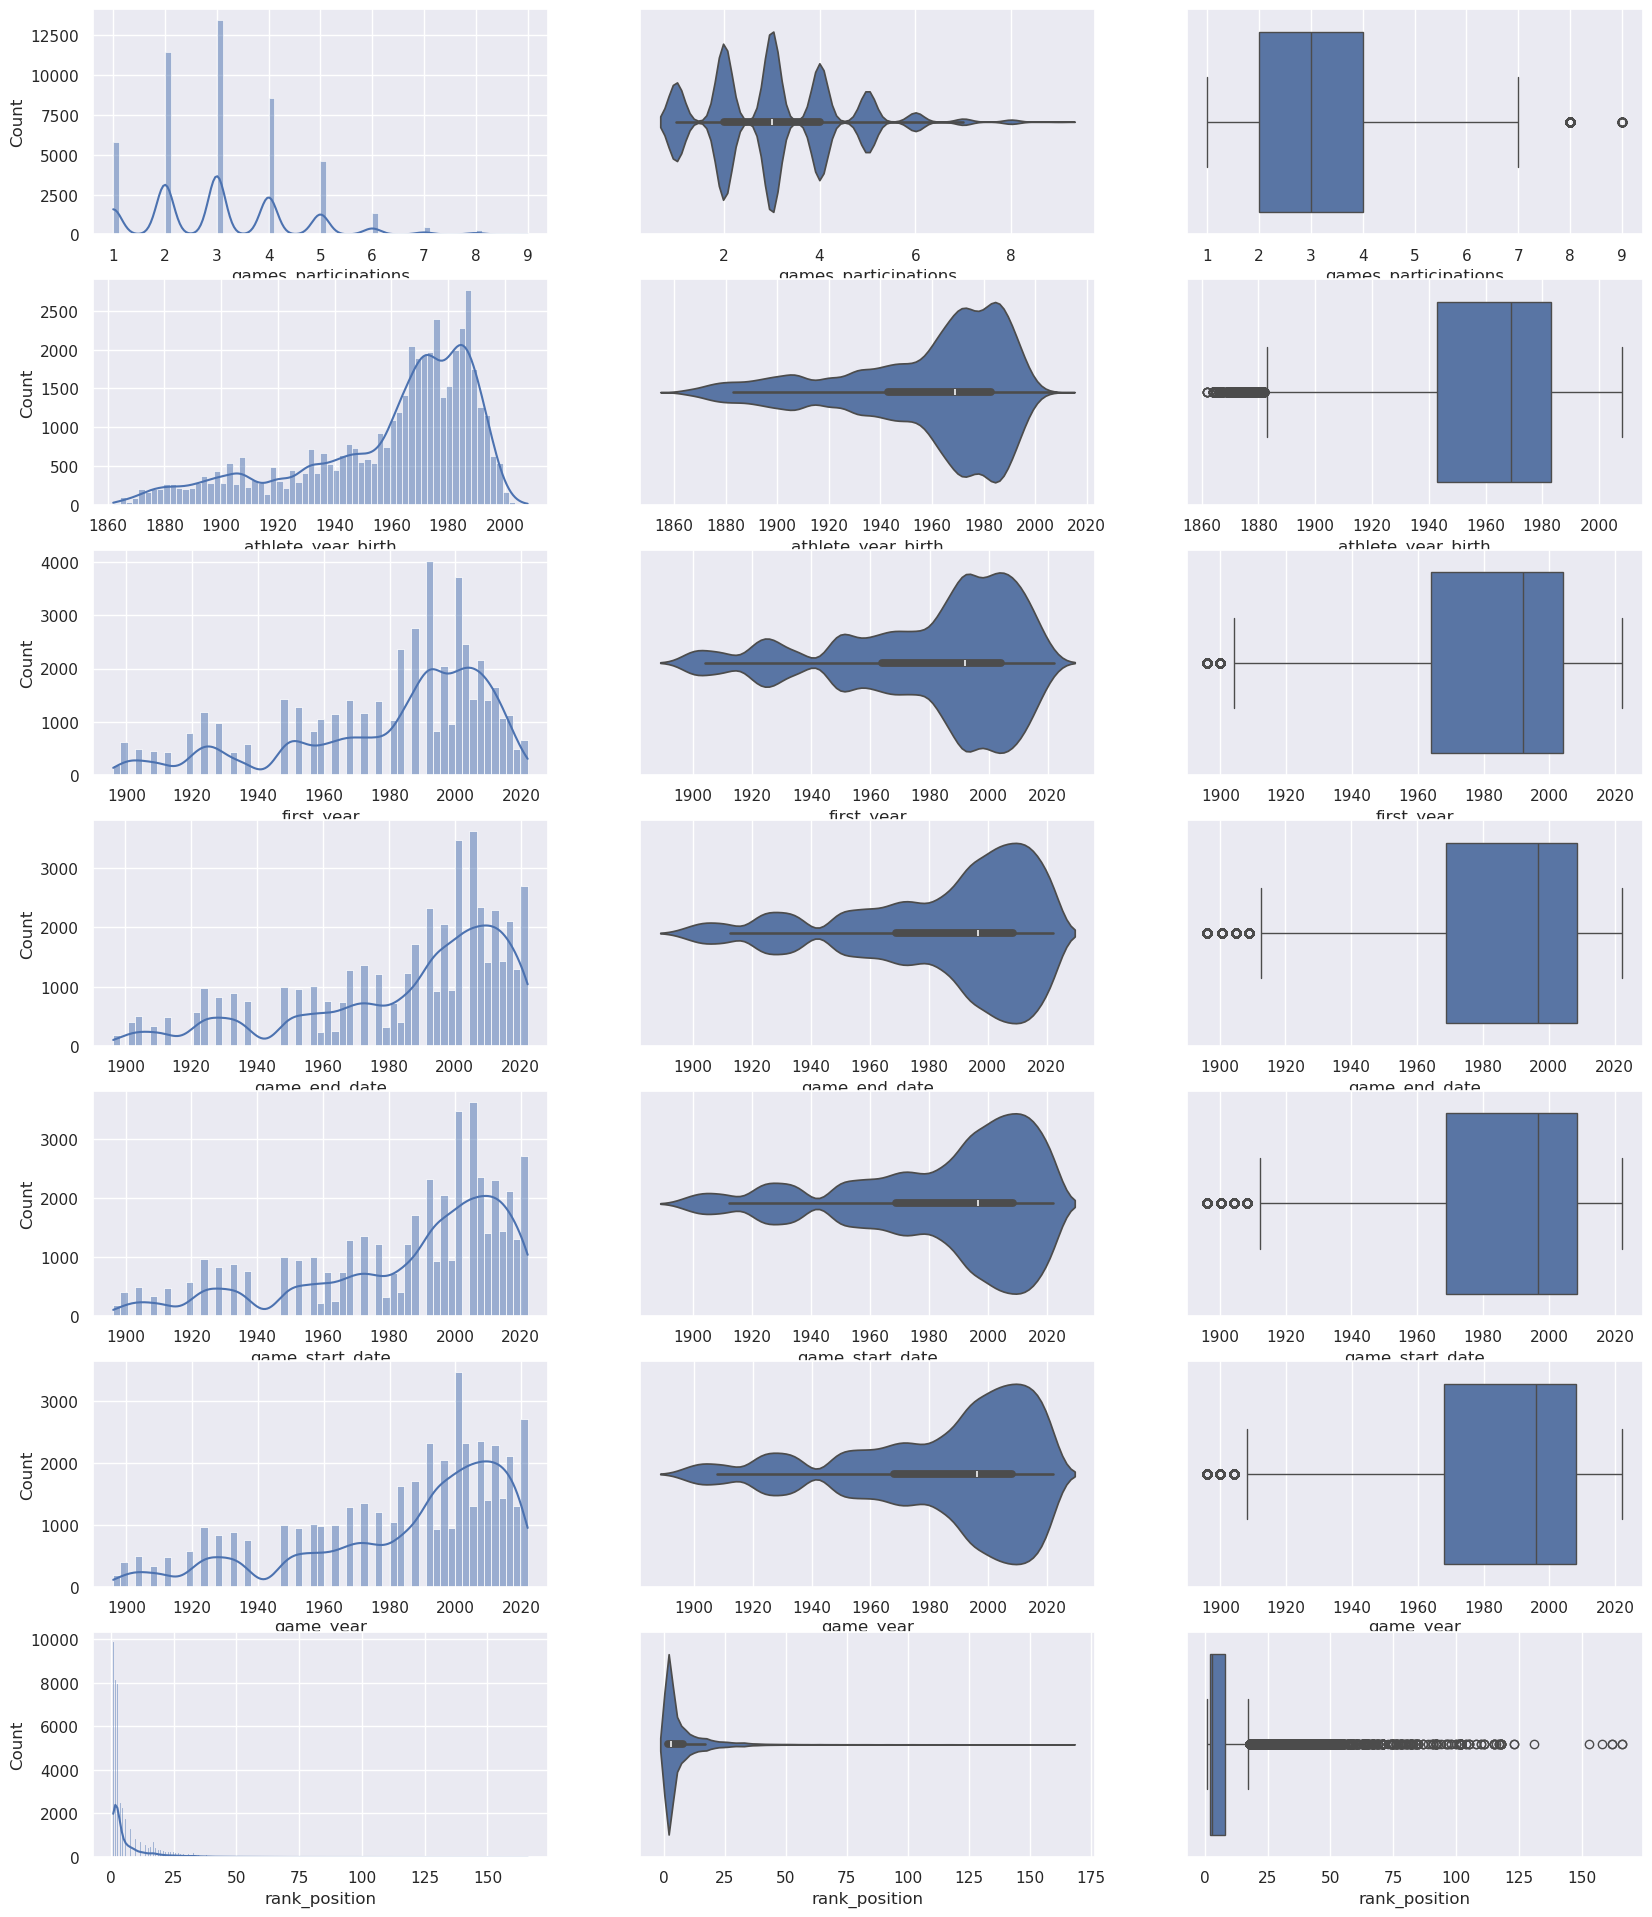

In [145]:
_, axes = plt.subplots(len(nums), 3, figsize=(20,24))
for índice, columna in enumerate(nums):
    sns.histplot(ax=axes[índice,0], data=df_num, x=columna, kde=True)
    sns.violinplot(ax=axes[índice,1], data=df_num, x=columna)
    sns.boxplot(ax=axes[índice,2], data=df_num, x=columna)

**Insights**
- 'games_participations' é a única distribución que se axusta á 'Normal' (ou distribución gaussiana) (con algúns outliers)
- os atributos de anos e datas teñen distribucións que semellan normais, mais sesgadas á esquerda, é dicir, concentran maior número de ocorrencias na parte dereita da "campá"
- 'displacement' e 'horsepower' semellan lonxe da  normal

Análise dos valores anómalos

In [146]:
# Amosamos as cantidades de valores anómalos:
def valores_anómalos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    BI = Q1 - 1.5 * IQR
    BS = Q3 + 1.5 * IQR
    return df[(df[columna] < BI) | (df[columna] > BS)], df[df[columna] < BI], df[df[columna] > BS]

for columna in nums:
    anomalías, por_debaixo, por_enriba = valores_anómalos(df_num, columna)
    if len(anomalías):
        print(f"* {columna} ten {len(anomalías)} anomalías, {len(por_debaixo)} por debaixo e {len(por_enriba)} por enriba.")
    else:
        print(f"* {columna} non ten anomalías.\n")

* games_participations ten 340 anomalías, 0 por debaixo e 340 por enriba.
* athlete_year_birth ten 1332 anomalías, 1332 por debaixo e 0 por enriba.
* first_year ten 816 anomalías, 816 por debaixo e 0 por enriba.
* game_end_date ten 1432 anomalías, 1432 por debaixo e 0 por enriba.
* game_start_date ten 1432 anomalías, 1432 por debaixo e 0 por enriba.
* game_year ten 1092 anomalías, 1092 por debaixo e 0 por enriba.
* rank_position ten 4662 anomalías, 0 por debaixo e 4662 por enriba.


In [147]:
# Mostra algúns valores atípicos na columna de 'games_participations'
valores_anómalos(df_num, "games_participations")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
15665                     8                1964        1984    1996-08-05   
5982                      8                1972        1992    2006-02-26   
22533                     9                1947        1976    1992-08-09   
6065                      8                1972        1992    1998-02-22   
15668                     8                1964        1984    1996-08-05   
6023                      8                1972        1992    2002-02-24   
15672                     8                1964        1984    1984-08-12   
6110                      8                1972        1992    1994-02-27   
15860                     8                1963        1984    2008-08-24   
5980                      8                1972        1992    2006-02-26   

      game_start_date  game_year  rank_position  
15665      1996-07-19       1996              2  
5982       2006-02-10       2006              9  
22533      1992-07-25       1992              1  
6065       1998-02-06       1998              1  
15668      1996-07-19       1996              3  
6023       2002-02-08       2002              4  
15672      1984-07-28       1984              2  
6110       1994-02-12       1994              3  
15860      2008-08-08       2008              1  
5980       2006-02-10       2006             20

In [148]:
# Mostra algúns valores atípicos na columna de 'athlete_year_birth'
valores_anómalos(df_num, "athlete_year_birth")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
46037                     1                1865        1896    1896-04-15   
45445                     3                1879        1908    1912-07-27   
44694                     4                1873        1900    1900-10-28   
44996                     2                1879        1900    1900-10-28   
46054                     1                1876        1896    1896-04-15   
44251                     2                1866        1900    1920-09-12   
44389                     4                1880        1900    1908-10-31   
45443                     3                1879        1908    1912-07-27   
45052                     2                1866        1900    1900-10-28   
44661                     3                1881        1904    1904-11-24   

      game_start_date  game_year  rank_position  
46037      1896-04-06       1896              2  
45445      1912-05-05       1912             27  
44694      1900-05-14       1900              1  
44996      1900-05-14       1900              5  
46054      1896-04-06       1896              1  
44251      1920-04-20       1920              4  
44389      1908-04-27       1908              4  
45443      1912-05-05       1912             28  
45052      1900-05-14       1900              9  
44661      1904-07-01       1904              1

In [149]:
# Mostra algúns valores atípicos na columna de 'first_year'
valores_anómalos(df_num, "first_year")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
45108                     1                1875        1900    1900-10-28   
45174                     2                1878        1900    1900-10-28   
44686                     4                1873        1900    1900-10-28   
46043                     1                1874        1896    1896-04-15   
44743                     3                1873        1900    1908-10-31   
43847                     5                1871        1900    1912-07-27   
44854                     4                1881        1900    1904-11-24   
45919                     2                1874        1896    1896-04-15   
43836                     5                1871        1900    1900-10-28   
45227                     1                1877        1900    1900-10-28   

      game_start_date  game_year  rank_position  
45108      1900-05-14       1900              6  
45174      1900-05-14       1900              3  
44686      1900-05-14       1900              1  
46043      1896-04-06       1896              1  
44743      1908-04-27       1908              4  
43847      1912-05-05       1912             14  
44854      1904-07-01       1904              2  
45919      1896-04-06       1896              4  
43836      1900-05-14       1900              2  
45227      1900-05-14       1900              3

In [150]:
# Mostra algúns valores atípicos na columna de 'game_end_date'
valores_anómalos(df_num, "game_end_date")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
44745                     3                1873        1900    1908-10-31   
44450                     3                1885        1904    1908-10-31   
44407                     4                1880        1900    1908-10-31   
45697                     1                1870        1904    1904-11-24   
44335                     2                1875        1908    1908-10-31   
45695                     1                1870        1904    1904-11-24   
45058                     1                1876        1900    1900-10-28   
44721                     4                1873        1900    1904-11-24   
45017                     1                1875        1900    1900-10-28   
45848                     1                1885        1904    1904-11-24   

      game_start_date  game_year  rank_position  
44745      1908-04-27       1908              1  
44450      1908-04-27       1908              2  
44407      1908-04-27       1908              2  
45697      1904-07-01       1904            118  
44335      1908-04-27       1908              2  
45695      1904-07-01       1904              3  
45058      1900-05-14       1900              2  
44721      1904-07-01       1904              1  
45017      1900-05-14       1900              1  
45848      1904-07-01       1904              1

In [151]:
# Mostra algúns valores atípicos na columna de 'game_start_date'
valores_anómalos(df_num, "game_start_date")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
44306                     5                1874        1900    1908-10-31   
45936                     3                1874        1896    1896-04-15   
45180                     1                1874        1900    1900-10-28   
45088                     1                1874        1900    1900-10-28   
44448                     3                1886        1908    1908-10-31   
45075                     1                1876        1900    1900-10-28   
44829                     4                1881        1900    1900-10-28   
44967                     3                1879        1900    1904-11-24   
45082                     1                1876        1900    1900-10-28   
45816                     1                1884        1904    1904-11-24   

      game_start_date  game_year  rank_position  
44306      1908-04-27       1908             31  
45936      1896-04-06       1896              1  
45180      1900-05-14       1900             10  
45088      1900-05-14       1900              3  
44448      1908-04-27       1908              2  
45075      1900-05-14       1900              2  
44829      1900-05-14       1900              3  
44967      1904-07-01       1904              5  
45082      1900-05-14       1900              2  
45816      1904-07-01       1904              3

In [152]:
# Mostra algúns valores atípicos na columna de 'game_year'
valores_anómalos(df_num, "game_year")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
45576                     2                1884        1904    1904-11-24   
45747                     1                1877        1904    1904-11-24   
45837                     1                1885        1904    1904-11-24   
45042                     1                1864        1900    1900-10-28   
44595                     2                1881        1904    1904-11-24   
45206                     1                1877        1900    1900-10-28   
44977                     2                1878        1900    1904-11-24   
44792                     2                1883        1904    1904-11-24   
45035                     1                1866        1900    1900-10-28   
45831                     1                1884        1904    1904-11-24   

      game_start_date  game_year  rank_position  
45576      1904-07-01       1904              3  
45747      1904-07-01       1904              1  
45837      1904-07-01       1904              2  
45042      1900-05-14       1900              1  
44595      1904-07-01       1904              1  
45206      1900-05-14       1900              4  
44977      1904-07-01       1904              3  
44792      1904-07-01       1904              3  
45035      1900-05-14       1900             15  
45831      1904-07-01       1904              3

In [153]:
# Mostra algúns valores atípicos na columna de 'rank_position'
valores_anómalos(df_num, "rank_position")[0].sample(10)

games_participations  athlete_year_birth  first_year game_end_date  \
4190                      6                1974        1994    2002-02-24   
8045                      3                1979        1998    2002-02-24   
27786                     3                1969        1988    1996-08-05   
39145                     2                1931        1956    1956-02-05   
19314                     4                1988        2008    2012-08-12   
32968                     3                1955        1976    1976-02-15   
23552                     2                1965        1988    1988-10-02   
7039                      2                1980        2002    2006-02-26   
19569                     3                1987        2008    2012-08-12   
36952                     3                1944        1968    1968-02-18   

      game_start_date  game_year  rank_position  
4190       2002-02-08       2002             28  
8045       2002-02-08       2002             22  
27786      1996-07-19       1996             32  
39145      1956-01-26       1956             19  
19314      2012-07-27       2012             33  
32968      1976-02-04       1976             21  
23552      1988-09-16       1988             26  
7039       2006-02-10       2006             25  
19569      2012-07-27       2012             19  
36952      1968-02-06       1968             29

**Insights**
- Os valores atípicos en `rank_position` parecen ser aleatorios, non se detecta ningún patrón.
- Os valores atípicos en `games_participations` parecen ser aleatorios, excepto por que os atributos do ano de nacemento (1975 o máis novo) e do primeiro ano (1992 o máis recente) son bastante afastados no tempo con respecto a agora, pois a un cativo aínda non lle deu tempo a participar en moitos xogos.
- Os valores atípicos nas columnas de datas e anos (`athlete_year_birth`, `first_year`, `game_end_date`, `game_start_date` e `game_year`) son aleatorios con respecto ás demais columnas pero correlaciónanse entre elas. As filas dos valores que son anómalos nunha desas columnas seméllanse ás filas dos valores que son anómalos nas outras columnas (desta lista cerrada). Ser vello é unha anomalía.

Relación entre os diferentes atributos numéricos

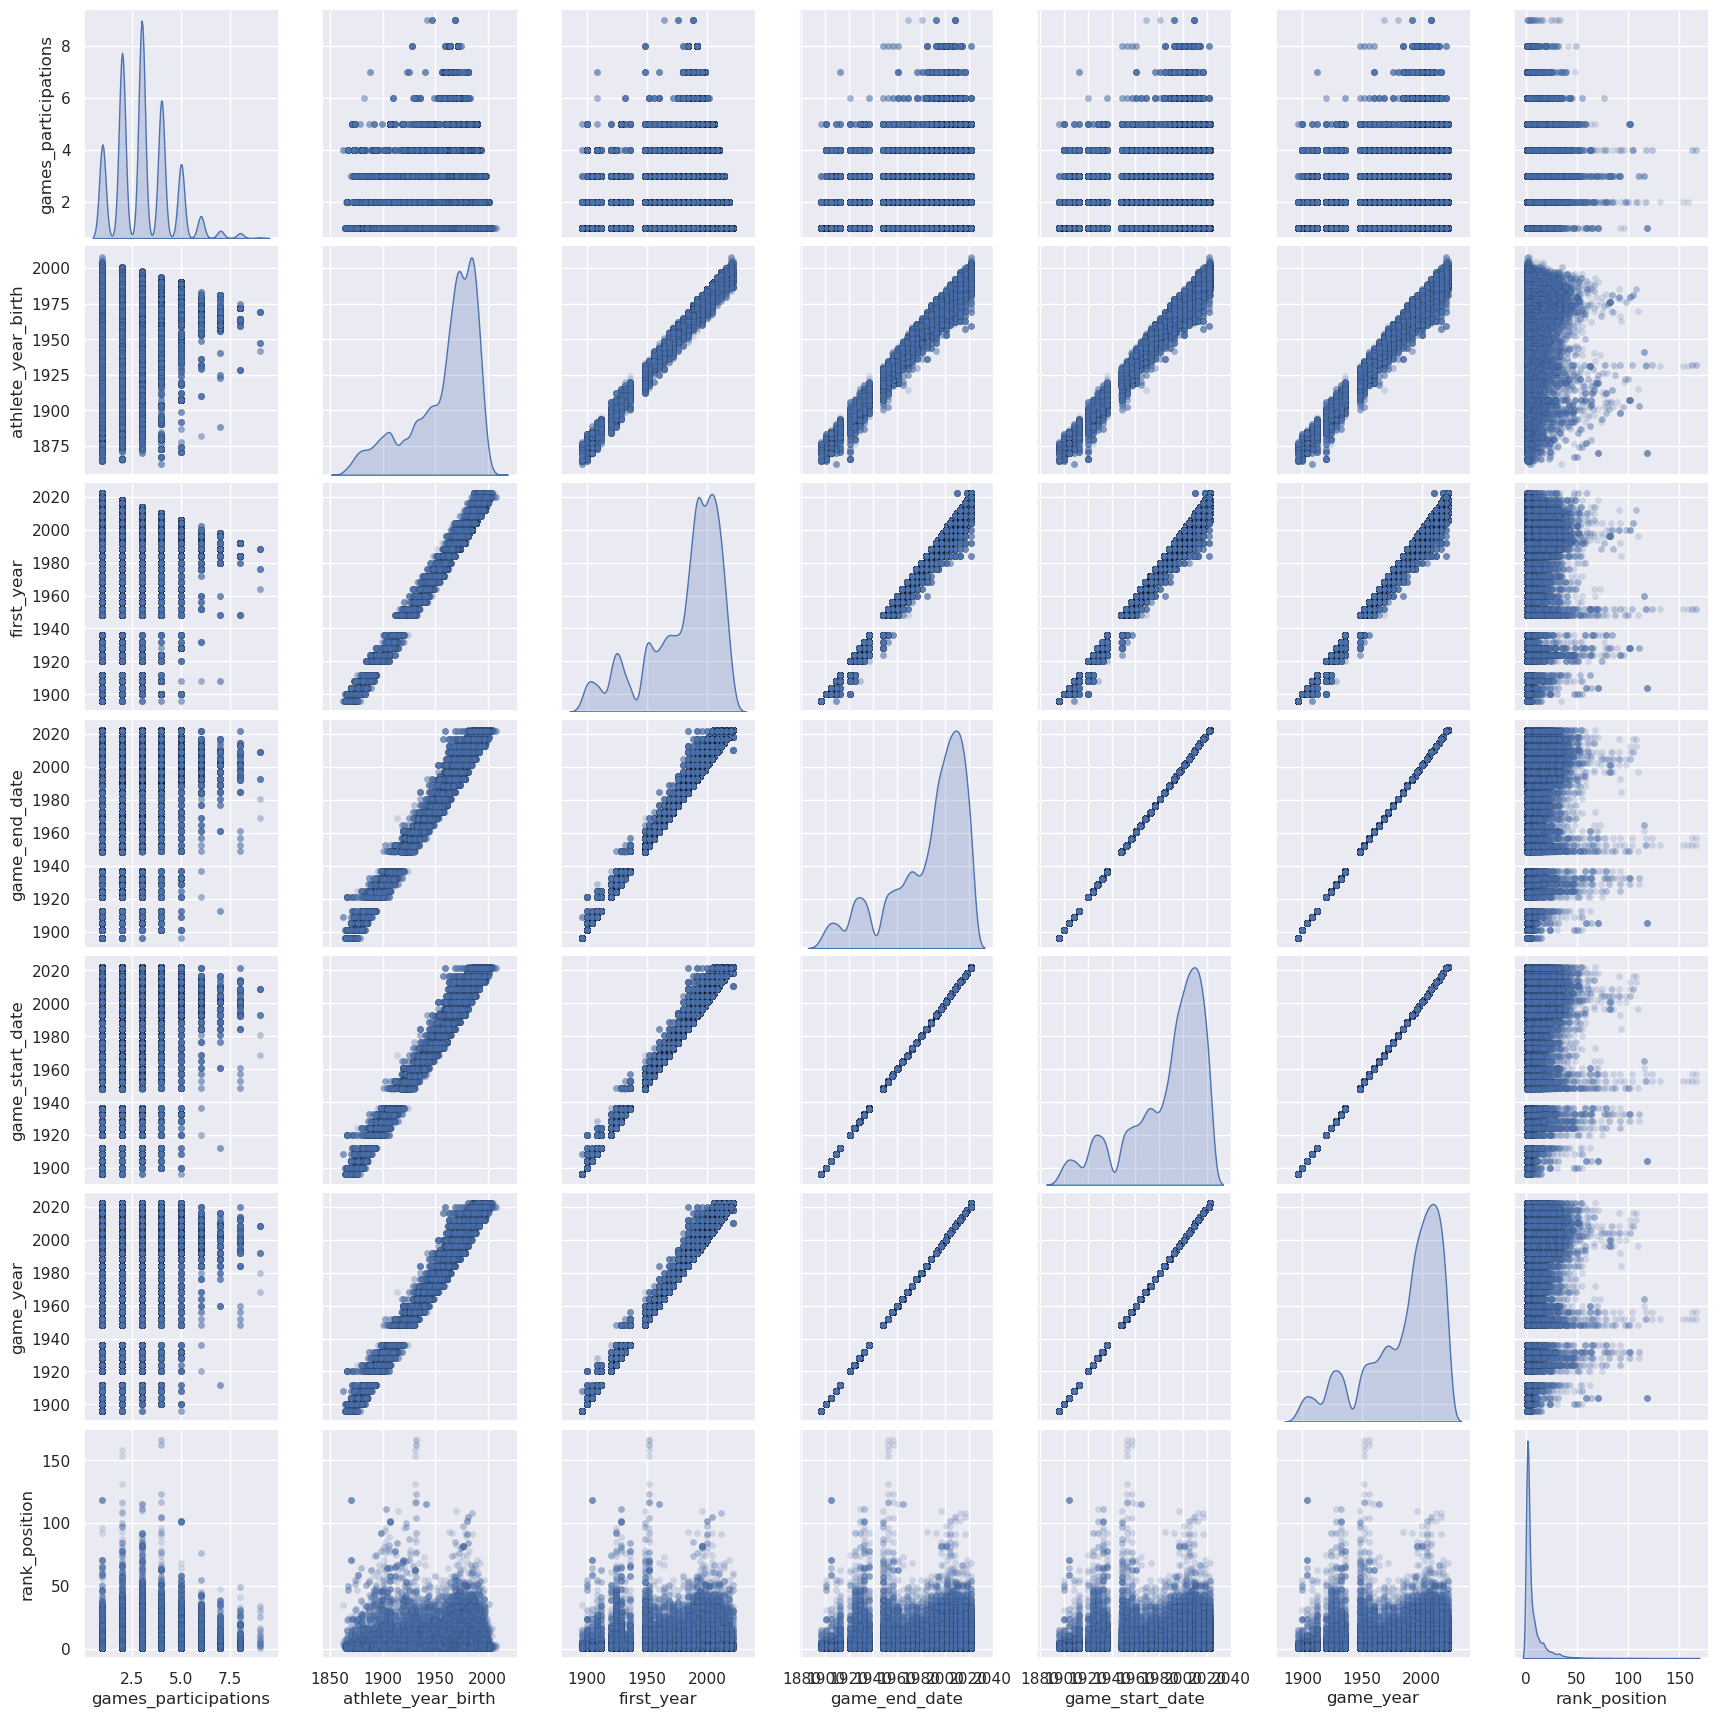

In [154]:
sns.pairplot(data=df_num, vars=nums, diag_kind='kde',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.2), diag_kws=dict(fill=True))
plt.show()

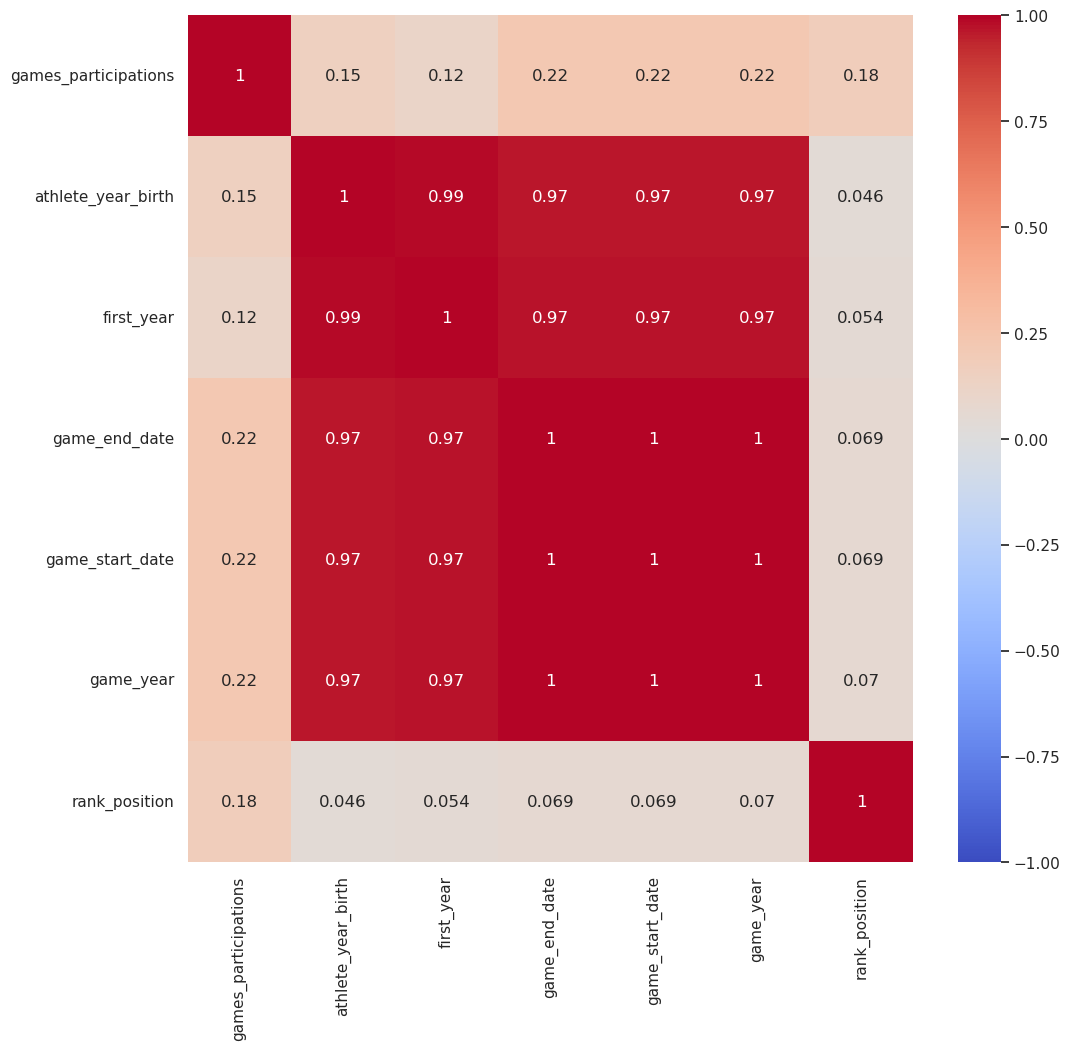

In [155]:
# Matriz de correlación
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**Insights**
- Os atributos de datas e anos (`athlete_year_birth`, `first_year`, `game_end_date`, `game_start_date` e `game_year`) correlaciónanse positivamente.
- `games_participations` e `rank_position` teñen moi pouca correlación coas demais columnas.
- Non hai correlacións negativas.

## ANÁLISE DA RELACIÓN ENTRE CATEGÓRICOS E NUMÉRICOS

In [156]:
df = pd.read_csv("super_df_cleaned.csv")

In [157]:
df

discipline_title event_gender medal_type participant_type game_season  \
0      Freestyle Skiing          Men     SILVER          Athlete      Winter   
1      Freestyle Skiing          Men     SILVER          Athlete      Winter   
2      Freestyle Skiing          Men     SILVER          Athlete      Winter   
3      Freestyle Skiing          Men     BRONZE          Athlete      Winter   
4      Freestyle Skiing          Men     BRONZE          Athlete      Winter   
...                 ...          ...        ...              ...         ...   
46070          Shooting          Men       GOLD          Athlete      Summer   
46071          Shooting          Men       GOLD          Athlete      Summer   
46072          Shooting          Men       GOLD          Athlete      Summer   
46073            Tennis          Men       GOLD          Athlete      Summer   
46074         Wrestling          Men     SILVER          Athlete      Summer   

       games_participations  athlete_year_birth  first_year game_end_date  \
0                         3                1994        2014    2018-02-25   
1                         3                1994        2014    2018-02-25   
2                         3                1994        2014    2018-02-25   
3                         2                1997        2018    2018-02-25   
4                         2                1997        2018    2018-02-25   
...                     ...                 ...         ...           ...   
46070                     1                1868        1896    1896-04-15   
46071                     1                1876        1896    1896-04-15   
46072                     1                1876        1896    1896-04-15   
46073                     1                1870        1896    1896-04-15   
46074                     1                1871        1896    1896-04-15   

      game_start_date  game_year  rank_position  
0          2018-02-08       2018             29  
1          2018-02-08       2018              2  
2          2018-02-08       2018              7  
3          2018-02-08       2018              7  
4          2018-02-08       2018              3  
...               ...        ...            ...  
46070      1896-04-06       1896              1  
46071      1896-04-06       1896              1  
46072      1896-04-06       1896              5  
46073      1896-04-06       1896              1  
46074      1896-04-06       1896              2  

[46075 rows x 12 columns]

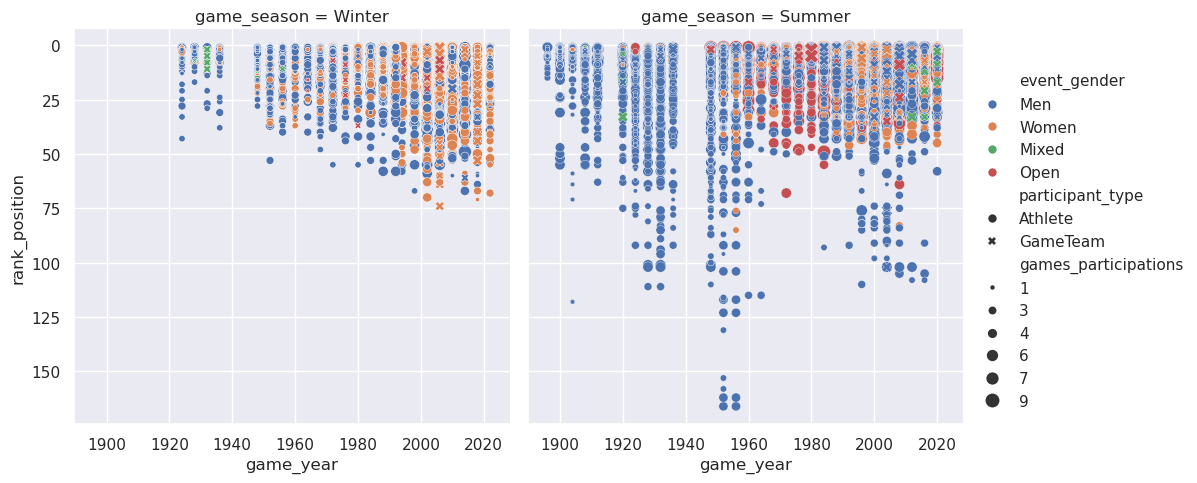

In [158]:
sns.relplot(
    data=df, x="game_year", y="rank_position", col="game_season",
    hue="event_gender", size="games_participations", style="participant_type",
    palette=sns.color_palette(n_colors=4), sizes=(10, 100)
)
plt.ylim(reversed(plt.ylim()))
plt.show()

**Insights**
- Os xogos de inverno son máis novos que os de verán.
- Nos xogos de inverno hai menos Open event_gender que nos de verán.
- A medida que pasan os anos, as mulleres participan máis, e nas últimas décadas, nos xogos de inverno, hai máis mulleres que homes.
- Antes da segunda guerra mundial, nos xogos de inverno había Mixed event_gender. Agora hainos nos de verán.
- Hai medio século nos xogos de verán levábase o Open event_gender, agora xa non tanto.
- A medida que pasan os anos, cada vez hai máis GameTeam participant_type.
- Vese reflectido que non hubo xogos por mor das guerras mundiais.

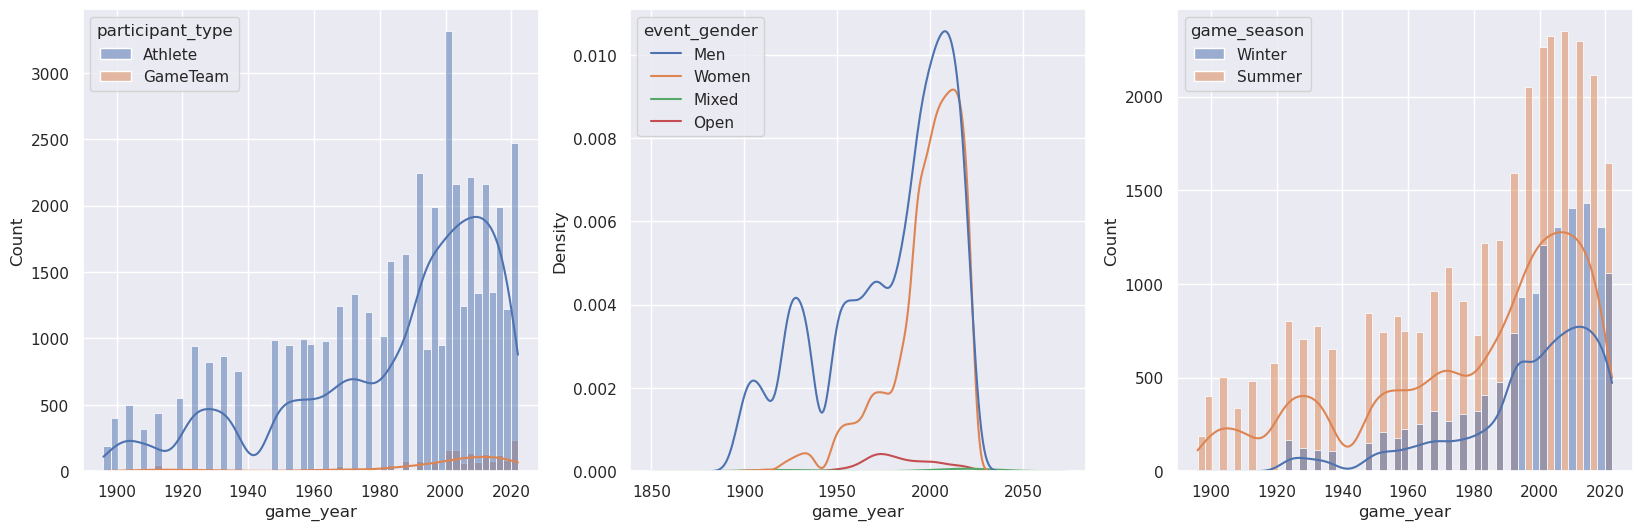

In [159]:
_, axes = plt.subplots(1, 3, figsize=(20,6))
sns.histplot(ax=axes[0], data=df, x="game_year", hue="participant_type", kde=True)
sns.kdeplot(ax=axes[1], data=df, x="game_year", hue="event_gender")
sns.histplot(ax=axes[2], data=df, x="game_year", hue="game_season", kde=True)
plt.show()

**Insights**
- Aínda que existen dende hai un século, nas últimas décadas estase a fomentar GameTeam participant_type.
- Open event_gender tivo o seu auxe hai medio século.
- A finais do século XX os xogos de inverno, que antano se celebraban nos mesmos anos que os xogos de verán, comezáronse a celebrar entre cada dous anos dos xogos de verán.